In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy as sp
import xgboost as xgb
from scipy import sparse
from IPython.display import Image
from sklearn.feature_extraction.text import TfidfVectorizer
import seaborn as sns
from mpl_toolkits.mplot3d import Axes3D
sns.set(style="ticks", color_codes=True)
from sklearn.feature_extraction.text import CountVectorizer
%matplotlib inline
import os
import gensim
import json
from sklearn.metrics import mean_squared_error
from datetime import datetime
import dateutil
from sklearn import preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import OneHotEncoder

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

random_state=2021

In [3]:
!pip install -U textblob
# from textblob import TextBlob

In [4]:
!pip install googletrans==3.1.0a0

In [5]:
!pip install advertools

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [7]:
# dataset = read_all()
df=pd.read_csv('/content/drive/MyDrive/NLP/final_dataset.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,9,14,17) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [8]:
dropped = ['following','posts_count','datetime', 'comments', 'location','image_url','external_url','media_type','business_email','is_verified','profile_image_link','id','url','thumbnails']
data = df.drop(dropped,axis=1)
data

,account,caption,profile_name,biography,likes,followers
0,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,🌎🧳🔥🥇🎨🍷☕\n 🇻🇪 🇨🇴\nEMPRESARIO SOÑADOR\...,NaN,1244.0
2,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,Consultant Plastic and Reconstructive Surgeon,NaN,13.0
4,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...
74544,thesavoylondon,"Alongside hospitality, the performing arts hav...",NaN,At the forefront of the luxury hotel scene for...,4079,167394.0
74545,thesavoylondon,This! Isn’t this what we are looking forward ...,NaN,At the forefront of the luxury hotel scene for...,1621,167394.0
74546,thesavoylondon,"For those of you who are missing London town, ...",NaN,At the forefront of the luxury hotel scene for...,1548,167394.0
74547,thesavoylondon,While we’re closed we’re going to try and keep...,NaN,At the forefront of the luxury hotel scene for...,2637,167394.0


In [9]:
#drop the rows which contain at least NaN values
data.dropna(axis=0,  how='any',inplace=True)

In [10]:
from textblob import TextBlob


def sentiment_analysis(caption):
 def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity
  
 #Create a function to get the polarity
 def getPolarity(caption):
   return TextBlob(caption).sentiment.polarity
  
 #Create two new columns ‘Subjectivity’ & ‘Polarity’
 data['TextBlob_Subjectivity'] =    data['caption'].apply(getSubjectivity)
 data ['TextBlob_Polarity'] = data['caption'].apply(getPolarity)


 def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


 data ['TextBlob_Analysis'] = data['TextBlob_Polarity'].apply(getAnalysis )
 return data

In [11]:
sentiment_analysis(data['caption'])

,account,caption,profile_name,biography,likes,followers,TextBlob_Subjectivity,TextBlob_Polarity,TextBlob_Analysis
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,0.632390,0.282576,Positive
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,0.405556,0.168056,Positive
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,0.000000,0.000000,Neutral
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,0.333333,0.250000,Positive
14,numberoneedin,Main course from our seasonal 7 course menu: B...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,0.333333,0.166667,Positive
...,...,...,...,...,...,...,...,...,...
74513,seacontainersldn,Scenario: You and your loved one are in desper...,Sea Containers London,Explore the vibrant South Bank from your Londo...,438,46265.0,0.680952,0.314286,Positive
74514,seacontainersldn,We’ve launched our ‘Nominate you Hero’ Vol. II...,Sea Containers London,Explore the vibrant South Bank from your Londo...,221,46265.0,0.658673,0.251531,Positive
74515,seacontainersldn,It’s not often that the lobby is shot at this ...,Sea Containers London,Explore the vibrant South Bank from your Londo...,859,46265.0,0.950000,0.600000,Positive
74516,seacontainersldn,"We are supporting @makeitblueuk, a community i...",Sea Containers London,Explore the vibrant South Bank from your Londo...,529,46265.0,0.439583,0.106250,Positive


In [12]:
dropped = ['TextBlob_Polarity','TextBlob_Subjectivity']
data = data.drop(dropped,axis=1)
data

,account,caption,profile_name,biography,likes,followers,TextBlob_Analysis
10,chelsea_bridge_clinic,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,Positive
11,chelsea_bridge_clinic,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,Positive
12,numberoneedin,"Hand dived Isle of Jura scallop, smoked roe, l...",Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,Neutral
13,numberoneedin,Jerusalem Artichoke prepared as your first des...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,Positive
14,numberoneedin,Main course from our seasonal 7 course menu: B...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,Positive
...,...,...,...,...,...,...,...
74513,seacontainersldn,Scenario: You and your loved one are in desper...,Sea Containers London,Explore the vibrant South Bank from your Londo...,438,46265.0,Positive
74514,seacontainersldn,We’ve launched our ‘Nominate you Hero’ Vol. II...,Sea Containers London,Explore the vibrant South Bank from your Londo...,221,46265.0,Positive
74515,seacontainersldn,It’s not often that the lobby is shot at this ...,Sea Containers London,Explore the vibrant South Bank from your Londo...,859,46265.0,Positive
74516,seacontainersldn,"We are supporting @makeitblueuk, a community i...",Sea Containers London,Explore the vibrant South Bank from your Londo...,529,46265.0,Positive


In [13]:
data = data.iloc[: , 1:]

In [14]:
data

,caption,profile_name,biography,likes,followers,TextBlob_Analysis
10,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,Positive
11,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,Positive
12,"Hand dived Isle of Jura scallop, smoked roe, l...",Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,Neutral
13,Jerusalem Artichoke prepared as your first des...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,Positive
14,Main course from our seasonal 7 course menu: B...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,Positive
...,...,...,...,...,...,...
74513,Scenario: You and your loved one are in desper...,Sea Containers London,Explore the vibrant South Bank from your Londo...,438,46265.0,Positive
74514,We’ve launched our ‘Nominate you Hero’ Vol. II...,Sea Containers London,Explore the vibrant South Bank from your Londo...,221,46265.0,Positive
74515,It’s not often that the lobby is shot at this ...,Sea Containers London,Explore the vibrant South Bank from your Londo...,859,46265.0,Positive
74516,"We are supporting @makeitblueuk, a community i...",Sea Containers London,Explore the vibrant South Bank from your Londo...,529,46265.0,Positive


In [15]:
import advertools as adv

hashtag_summary = adv.extract_hashtags(data['caption'])
hashtag_summary.keys()

dict_keys(['hashtags', 'hashtags_flat', 'hashtag_counts', 'hashtag_freq', 'top_hashtags', 'overview'])

In [16]:
hashtag_summary['hashtag_freq'][:10]

[(0, 27837),
 (1, 4697),
 (2, 2617),
 (3, 3106),
 (4, 2676),
 (5, 2611),
 (6, 2415),
 (7, 2308),
 (8, 2414),
 (9, 2008)]

##emoji

In [ ]:
emoji_summary = adv.extract_emoji(data['caption'])
emoji_summary.keys()

In [249]:
emoji_summary['top_emoji_text'][:10]

[]

###mention

In [22]:
mention_summary = adv.extract_mentions(data['caption'])
mention_summary.keys()

dict_keys(['mentions', 'mentions_flat', 'mention_counts', 'mention_freq', 'top_mentions', 'overview'])

In [256]:
mentions=mention_summary['top_mentions']
type(mentions)

list

##Question

In [24]:
question_summary = adv.extract_questions(data['caption'])

In [25]:
question_summary['overview']

{'num_posts': 73232,
 'num_question_marks': 17602,
 'question_marks_per_post': 0.24035940572427353,
 'unique_question_marks': 5}

##Intense words

In [26]:
intense_summary = adv.extract_intense_words(data['caption'], min_reps=3)

In [27]:
intense_summary['top_intense_words'][:20]

[('⠀⠀⠀⠀⠀⠀⠀⠀⠀', 542),
 ('...', 488),
 ('.⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 428),
 ('#eeeeeats', 319),
 ('www.dermamedical.co.uk', 240),
 ('\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063\u2063', 236),
 ('www.dermamedical.net.au', 204),
 ('www.dermamedical.se', 200),
 ('www.lmaclinic.com', 191),
 ('www.dermamedical.ae', 188),
 ('#coffeeedinburgh', 173),
 ('#111SKIN', 166),
 ('———————————————————————————', 155),
 ('www.drmaryamzamani.com', 153),
 ('・・・', 145),
 ('www.perfecteyesltd.com', 144),
 ('.⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀', 142),
 ('\u2063\u2063\u2063', 141),
 ('www.shumailas.click', 137),
 ('patients.⠀⠀⠀⠀⠀⠀⠀', 135)]

##currency symbol

In [28]:
currency_summary = adv.extract_currency(data['caption'])

In [29]:
currency_summary['top_currency_symbols']

[('£', 3791), ('$', 308), ('€', 23)]

##Frame dataset

In [30]:
# word_summary = adv.extract_words(data['caption'],entire_words_only=False)

In [31]:
extracted_tweets =  (data.assign(hashtags=hashtag_summary['hashtags'],
         hashcounts=hashtag_summary['hashtag_counts'],
         mentions=mention_summary['mentions'],
         mention_count=mention_summary['mention_counts'],
         emoji=emoji_summary['emoji'],
          emoji_text=emoji_summary['emoji_text'],
         emoji_count=emoji_summary['emoji_counts']         
         ))

extracted_tweets.head(5)

,caption,profile_name,biography,likes,followers,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count
10,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,Positive,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10
11,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,Positive,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2
12,"Hand dived Isle of Jura scallop, smoked roe, l...",Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,Neutral,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0
13,Jerusalem Artichoke prepared as your first des...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,Positive,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0
14,Main course from our seasonal 7 course menu: B...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,Positive,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0


In [32]:
le = preprocessing.LabelEncoder()
le.fit(extracted_tweets["TextBlob_Analysis"])
list(le.classes_)
account_num=le.transform(extracted_tweets["TextBlob_Analysis"])
extracted_tweets["TextBlob_Analysis"]=account_num

In [33]:
type(extracted_tweets)

pandas.core.frame.DataFrame

Let's say 10 people, each with 100 followers posted using the hashtag #basketball in their instagram.

Therefore those post are expected to potentially reach 10 x 100 = 1,000 people (not really that much because of follower overlap, and not everyone sees all post, but we will use this simplified assumption for now).
Let's also assume that only one person used the hashtag #NFL in these post. And let's also assume that this person has 20,000 followers. Then which hashtag reached more users?
Obviously #NFL would reach more because, although only one person posted it, that one person had more followers than the ten others who posted #basketball combined.



https://www.datacamp.com/community/tutorials/absolute-weighted-word-frequency

In [34]:
word_freq_hash = adv.word_frequency(extracted_tweets['hashtags'].str.join(' '), extracted_tweets['followers'].fillna(0))
word_freq_hash.head()
# type(word_freq_hash.word)

,word,abs_freq,wtd_freq,rel_value
0,#london,4737,98446898.0,20783.0
1,#plasticsurgery,3423,78919745.0,23056.0
2,#peggyporschen,121,69934975.0,577975.0
3,#cosmeticsurgery,2753,58649608.0,21304.0
4,#skincare,1709,52026462.0,30443.0


In [35]:
d=pd.Series(word_freq_hash.rel_value.values,index=word_freq_hash.word.values ).to_dict()
print(d.get('#chelseabridgeclinic'))
print(d.get('#london'))
print(d.get('#test'))

1093.0
20783.0
1093.0


In [36]:
def countHashtags(tags):
  if len(tags)==0:
    return 0
  sum = 0
  for i in tags:
    sum += (d.get(i))
  return sum/len(tags)

In [37]:
extracted_tweets['hashtags'][10]

['#londontesting',
 '#chelseabridgeclinic',
 '#london',
 '#test',
 '#antigentest',
 '#lateralflowtest',
 '#testforcovid',
 '#covidtesting']

In [38]:
hashtag_average = extracted_tweets['hashtags'].apply(countHashtags)

In [39]:
extracted_tweets['hashtag_popularity'] = hashtag_average

# extracted_tweets.drop(columns=extracted_tweets.columns[0], axis=1, inplace=True)

In [40]:
extracted_tweets.shape

(73232, 14)

In [41]:
# extracted_tweets['caption'][10]

Since the dataset is huge i have taken only 1000 rows to train the model

In [42]:
extracted_tweetss=extracted_tweets.iloc[:1000]

In [43]:
extracted_tweetss

,caption,profile_name,biography,likes,followers,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
10,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,2,"[#londontesting, #chelseabridgeclinic, #london...",8,[],0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]","[stopwatch, page facing up, health worker: lig...",10,3565.000000
11,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 👏\n.\nWe are very grateful for all t...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,2,"[#thankyou, #thankful, #feedback, #chlseabridg...",9,[],0,"[👏, 🧡]","[clapping hands, orange heart]",2,6669.111111
12,"Hand dived Isle of Jura scallop, smoked roe, l...",Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,1,"[#edinburghfoodies, #edinburghrestaurants, #nu...",25,[],0,[],[],0,21105.000000
13,Jerusalem Artichoke prepared as your first des...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,2,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,[],0,[],[],0,20552.714286
14,Main course from our seasonal 7 course menu: B...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,2,"[#michelin, #michelinstar, #michelinuk, #edinb...",28,"[@castlegamescotland, @wellocksfood]",2,[],[],0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,Celebrate your #bankholiday in style this week...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",12.0,1151.0,2,"[#bankholiday, #alfresco, #indiandining, #live...",10,[],0,[],[],0,8189.300000
1058,😎you might not be able to fly abroad this summ...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",14.0,1151.0,2,"[#twickenham, #indiantapas, #gin, #vodka, #teq...",30,[],0,"[😎, 🥳, 🙌🏻, 💯, 🧉, 🍸, ☀️, 🍹]","[smiling face with sunglasses, partying face, ...",8,6886.866667
1059,🥳🧉🌶🛼We are open for delivery and collection! J...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",28.0,1151.0,2,"[#indianfood, #indiancuisine, #indiantakeaway,...",29,[],0,"[🥳, 🧉, 🌶, 🛼]","[partying face, mate, hot pepper, roller skate]",4,6230.965517
1060,Do you fancy a little spice tonight? \nWhy not...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",20.0,1151.0,0,"[#tapastuesday, #lovinglife, #livethelittlethi...",22,[],0,"[🌶, 🥳, ❤️, 😍, 🙌🏻]","[hot pepper, partying face, red heart, smiling...",5,9163.590909


###Preprocessing

In [44]:
from functools import reduce
import re
import nltk
from nltk.corpus import stopwords
from googletrans import Translator

REPLACE_BY_SPACE_RE = re.compile('[/(){}\[\]\|@,;.!?]')
REPLACE_mentions = re.compile('@[A-Za-z0-9_]+')
REPLACE_hashtags=re.compile('#[A-Za-z0-9_]+')
GOOD_SYMBOLS_RE = re.compile("^[a-zA-Z0-9_-]*$")
REPLACE_BY_ = re.compile('_')

try:
    STOPWORDS = set(stopwords.words('english'))
except LookupError:
    nltk.download('stopwords')
    STOPWORDS = set(stopwords.words('english'))


def lower(text: str) -> str:
    return text


def clean_mention(text:str)-> str:
    return REPLACE_mentions.sub(' ', text)

def clean_hashtags(text:str)-> str:
    return REPLACE_hashtags.sub(' ', text)

def replace_special_characters(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_SPACE_RE.sub(' ', text)


def replace_by_underscore(text: str) -> str:
    """
    Replaces special characters, such as paranthesis,
    with spacing character
    """

    return REPLACE_BY_.sub(' ', text)

def replace_br(text: str) -> str:
    """
    Replaces br characters
    """

    return text.replace('br', '')

def filter_out_uncommon_symbols(text: str) -> str:
    """
    Removes any special character that is not in the
    good symbols list (check regular expression)
    """

    return GOOD_SYMBOLS_RE.sub('', text)

def remove_stopwords(text: str) -> str:
    return ' '.join([x for x in text.split() if x and x not in STOPWORDS])


def strip_text(text: str) -> str:
    """
    Removes any left or right spacing (including carriage return) from text.
    Example:
    Input: '  This assignment is cool\n'
    Output: 'This assignment is cool'
    """

    return text.strip()

def translation(text: str) -> str:
  translator = Translator()
  res=translator.translate(text, dest='en')
  return res.text


def remove_brackets_from_list(text:str)->str:
    return text


def remove_emoji(text:str)->str:
    regrex_pattern = re.compile(pattern = "["
        u"\u231A-\u231B"
        u"\u23E9-\u23EC"
        u"\u25FD-\u25FE"
        u"\u2614-\u2615"
        u"\u2648-\u2653"
        u"\u26AA-\u26AB"
        u"\u26BD-\u26BE"
        u"\u26C4-\u26C5"
        u"\u26F2-\u26F3"
        u"\u270A-\u270B"
        u"\u2753-\u2755"
        u"\u2795-\u2797"
        u"\u2B1B-\u2B1C"
        u"\U0001F191-\U0001F19A"
        u"\U0001F232-\U0001F236"
        u"\U0001F238-\U0001F23A"
        u"\U0001F250-\U0001F251"
        u"\U0001F300-\U0001F30C"
        u"\U0001F30D-\U0001F30E"
        u"\U0001F313-\U0001F315"
        u"\U0001F316-\U0001F318"
        u"\U0001F31D-\U0001F31E"
        u"\U0001F31F-\U0001F320"
        u"\U0001F32D-\U0001F32F"
        u"\U0001F330-\U0001F331"
        u"\U0001F332-\U0001F333"
        u"\U0001F334-\U0001F335"
        u"\U0001F337-\U0001F34A"
        u"\U0001F34C-\U0001F34F"
        u"\U0001F351-\U0001F37B"
        u"\U0001F37E-\U0001F37F"
        u"\U0001F380-\U0001F393"
        u"\U0001F3A0-\U0001F3C4"
        u"\U0001F3CF-\U0001F3D3"
        u"\U0001F3E0-\U0001F3E3"
        u"\U0001F3E5-\U0001F3F0"
        u"\U0001F3F8-\U0001F407"
        u"\U0001F409-\U0001F40B"
        u"\U0001F40C-\U0001F40E"
        u"\U0001F40F-\U0001F410"
        u"\U0001F411-\U0001F412"
        u"\U0001F417-\U0001F429"
        u"\U0001F42B-\U0001F43E"
        u"\U0001F442-\U0001F464"
        u"\U0001F466-\U0001F46B"
        u"\U0001F46C-\U0001F46D"
        u"\U0001F46E-\U0001F4AC"
        u"\U0001F4AE-\U0001F4B5"
        u"\U0001F4B6-\U0001F4B7"
        u"\U0001F4B8-\U0001F4EB"
        u"\U0001F4EC-\U0001F4ED"
        u"\U0001F4F0-\U0001F4F4"
        u"\U0001F4F6-\U0001F4F7"
        u"\U0001F4F9-\U0001F4FC"
        u"\U0001F4FF-\U0001F502"
        u"\U0001F504-\U0001F507"
        u"\U0001F50A-\U0001F514"
        u"\U0001F516-\U0001F52B"
        u"\U0001F52C-\U0001F52D"
        u"\U0001F52E-\U0001F53D"
        u"\U0001F54B-\U0001F54E"
        u"\U0001F550-\U0001F55B"
        u"\U0001F55C-\U0001F567"
        u"\U0001F595-\U0001F596"
        u"\U0001F5FB-\U0001F5FF"
        u"\U0001F601-\U0001F606"
        u"\U0001F607-\U0001F608"
        u"\U0001F609-\U0001F60D"
        u"\U0001F612-\U0001F614"
        u"\U0001F61C-\U0001F61E"
        u"\U0001F620-\U0001F625"
        u"\U0001F626-\U0001F627"
        u"\U0001F628-\U0001F62B"
        u"\U0001F62E-\U0001F62F"
        u"\U0001F630-\U0001F633"
        u"\U0001F637-\U0001F640"
        u"\U0001F641-\U0001F644"
        u"\U0001F645-\U0001F64F"
        u"\U0001F681-\U0001F682"
        u"\U0001F683-\U0001F685"
        u"\U0001F68A-\U0001F68B"
        u"\U0001F691-\U0001F693"
        u"\U0001F699-\U0001F69A"
        u"\U0001F69B-\U0001F6A1"
        u"\U0001F6A4-\U0001F6A5"
        u"\U0001F6A7-\U0001F6AD"
        u"\U0001F6AE-\U0001F6B1"
        u"\U0001F6B3-\U0001F6B5"
        u"\U0001F6B7-\U0001F6B8"
        u"\U0001F6B9-\U0001F6BE"
        u"\U0001F6C1-\U0001F6C5"
        u"\U0001F6D1-\U0001F6D2"
        u"\U0001F6D6-\U0001F6D7"
        u"\U0001F6DD-\U0001F6DF"
        u"\U0001F6EB-\U0001F6EC"
        u"\U0001F6F4-\U0001F6F6"
        u"\U0001F6F7-\U0001F6F8"
        u"\U0001F6FB-\U0001F6FC"
        u"\U0001F7E0-\U0001F7EB"
        u"\U0001F90D-\U0001F90F"
        u"\U0001F910-\U0001F918"
        u"\U0001F919-\U0001F91E"
        u"\U0001F920-\U0001F927"
        u"\U0001F928-\U0001F92F"
        u"\U0001F931-\U0001F932"
        u"\U0001F933-\U0001F93A"
        u"\U0001F93C-\U0001F93E"
        u"\U0001F940-\U0001F945"
        u"\U0001F947-\U0001F94B"
        u"\U0001F94D-\U0001F94F"
        u"\U0001F950-\U0001F95E"
        u"\U0001F95F-\U0001F96B"
        u"\U0001F96C-\U0001F970"
        u"\U0001F973-\U0001F976"
        u"\U0001F977-\U0001F978"
        u"\U0001F97C-\U0001F97F"
        u"\U0001F980-\U0001F984"
        u"\U0001F985-\U0001F991"
        u"\U0001F992-\U0001F997"
        u"\U0001F998-\U0001F9A2"
        u"\U0001F9A3-\U0001F9A4"
        u"\U0001F9A5-\U0001F9AA"
        u"\U0001F9AB-\U0001F9AD"
        u"\U0001F9AE-\U0001F9AF"
        u"\U0001F9B0-\U0001F9B9"
        u"\U0001F9BA-\U0001F9BF"
        u"\U0001F9C1-\U0001F9C2"
        u"\U0001F9C3-\U0001F9CA"
        u"\U0001F9CD-\U0001F9CF"
        u"\U0001F9D0-\U0001F9E6"
        u"\U0001F9E7-\U0001F9FF"
        u"\U0001FA70-\U0001FA73"
        u"\U0001FA78-\U0001FA7A"
        u"\U0001FA7B-\U0001FA7C"
        u"\U0001FA80-\U0001FA82"
        u"\U0001FA83-\U0001FA86"
        u"\U0001FA90-\U0001FA95"
        u"\U0001FA96-\U0001FAA8"
        u"\U0001FAA9-\U0001FAAC"
        u"\U0001FAB0-\U0001FAB6"
        u"\U0001FAB7-\U0001FABA"
        u"\U0001FAC0-\U0001FAC2"
        u"\U0001FAC3-\U0001FAC5"
        u"\U0001FAD0-\U0001FAD6"
        u"\U0001FAD7-\U0001FAD9"
        u"\U0001FAE0-\U0001FAE7"
        u"\U0001FAF0-\U0001FAF6"
        u"\u23F0"
        u"\u23F3"
        u"\u267F"
        u"\u2693"
        u"\u26A1"
        u"\u26CE"
        u"\u26D4"
        u"\u26EA"
        u"\u26F5"
        u"\u26FA"
        u"\u26FD"
        u"\u2705"
        u"\u2728"
        u"\u274C"
        u"\u274E"
        u"\u2757"
        u"\u27B0"
        u"\u27BF"
        u"\u2B50"
        u"\u2B55"
        u"\U0001F004"
        u"\U0001F0CF"
        u"\U0001F18E"
        u"\U0001F201"
        u"\U0001F21A"
        u"\U0001F22F"
        u"\U0001F30F"
        u"\U0001F310"
        u"\U0001F311"
        u"\U0001F312"
        u"\U0001F319"
        u"\U0001F31A"
        u"\U0001F31B"
        u"\U0001F31C"
        u"\U0001F34B"
        u"\U0001F350"
        u"\U0001F37C"
        u"\U0001F3C5"
        u"\U0001F3C6"
        u"\U0001F3C7"
        u"\U0001F3C8"
        u"\U0001F3C9"
        u"\U0001F3CA"
        u"\U0001F3E4"
        u"\U0001F3F4"
        u"\U0001F408"
        u"\U0001F413"
        u"\U0001F414"
        u"\U0001F415"
        u"\U0001F416"
        u"\U0001F42A"
        u"\U0001F440"
        u"\U0001F465"
        u"\U0001F4AD"
        u"\U0001F4EE"
        u"\U0001F4EF"
        u"\U0001F4F5"
        u"\U0001F4F8"
        u"\U0001F503"
        u"\U0001F508"
        u"\U0001F509"
        u"\U0001F515"
        u"\U0001F57A"
        u"\U0001F5A4"
        u"\U0001F600"
        u"\U0001F60E"
        u"\U0001F60F"
        u"\U0001F610"
        u"\U0001F611"
        u"\U0001F615"
        u"\U0001F616"
        u"\U0001F617"
        u"\U0001F618"
        u"\U0001F619"
        u"\U0001F61A"
        u"\U0001F61B"
        u"\U0001F61F"
        u"\U0001F62C"
        u"\U0001F62D"
        u"\U0001F634"
        u"\U0001F635"
        u"\U0001F636"
        u"\U0001F680"
        u"\U0001F686"
        u"\U0001F687"
        u"\U0001F688"
        u"\U0001F689"
        u"\U0001F68C"
        u"\U0001F68D"
        u"\U0001F68E"
        u"\U0001F68F"
        u"\U0001F690"
        u"\U0001F694"
        u"\U0001F695"
        u"\U0001F696"
        u"\U0001F697"
        u"\U0001F698"
        u"\U0001F6A2"
        u"\U0001F6A3"
        u"\U0001F6A6"
        u"\U0001F6B2"
        u"\U0001F6B6"
        u"\U0001F6BF"
        u"\U0001F6C0"
        u"\U0001F6CC"
        u"\U0001F6D0"
        u"\U0001F6D5"
        u"\U0001F6F9"
        u"\U0001F6FA"
        u"\U0001F7F0"
        u"\U0001F90C"
        u"\U0001F91F"
        u"\U0001F930"
        u"\U0001F93F"
        u"\U0001F94C"
        u"\U0001F971"
        u"\U0001F972"
        u"\U0001F979"
        u"\U0001F97A"
        u"\U0001F97B"
        u"\U0001F9C0"
        u"\U0001F9CB"
        u"\U0001F9CC"
        u"\U0001FA74"
        u"\u00A9"
        u"\uFE0F"
        u"\u00AE"
        u"\uFE0F"
        u"\u203C"
        u"\uFE0F"
        u"\u2049"
        u"\uFE0F"
        u"\u2122"
        u"\uFE0F"
        u"\u2139"
        u"\uFE0F"
        u"\u2194"
        u"\uFE0F"
        u"\u2195"
        u"\uFE0F"
        u"\u2196"
        u"\uFE0F"
        u"\u2197"
        u"\uFE0F"
        u"\u2198"
        u"\uFE0F"
        u"\u2199"
        u"\uFE0F"
        u"\u21A9"
        u"\uFE0F"
        u"\u21AA"
        u"\uFE0F"
        u"\u2328"
        u"\uFE0F"
        u"\u23CF"
        u"\uFE0F"
        u"\u23ED"
        u"\uFE0F"
        u"\u23EE"
        u"\uFE0F"
        u"\u23EF"
        u"\uFE0F"
        u"\u23F1"
        u"\uFE0F"
        u"\u23F2"
        u"\uFE0F"
        u"\u23F8"
        u"\uFE0F"
        u"\u23F9"
        u"\uFE0F"
        u"\u23FA"
        u"\uFE0F"
        u"\u24C2"
        u"\uFE0F"
        u"\u25AA"
        u"\uFE0F"
        u"\u25AB"
        u"\uFE0F"
        u"\u25B6"
        u"\uFE0F"
        u"\u25C0"
        u"\uFE0F"
        u"\u25FB"
        u"\uFE0F"
        u"\u25FC"
        u"\uFE0F"
        u"\u2600"
        u"\uFE0F"
        u"\u2601"
        u"\uFE0F"
        u"\u2602"
        u"\uFE0F"
        u"\u2603"
        u"\uFE0F"
        u"\u2604"
        u"\uFE0F"
        u"\u260E"
        u"\uFE0F"
        u"\u2611"
        u"\uFE0F"
        u"\u2618"
        u"\uFE0F"
        u"\u261D"
        u"\uFE0F"
        u"\u2620"
        u"\uFE0F"
        u"\u2622"
        u"\uFE0F"
        u"\u2623"
        u"\uFE0F"
        u"\u2626"
        u"\uFE0F"
        u"\u262A"
        u"\uFE0F"
        u"\u262E"
        u"\uFE0F"
        u"\u262F"
        u"\uFE0F"
        u"\u2638"
        u"\uFE0F"
        u"\u2639"
        u"\uFE0F"
        u"\u263A"
        u"\uFE0F"
        u"\u2640"
        u"\uFE0F"
        u"\u2642"
        u"\uFE0F"
        u"\u265F"
        u"\uFE0F"
        u"\u2660"
        u"\uFE0F"
        u"\u2663"
        u"\uFE0F"
        u"\u2665"
        u"\uFE0F"
        u"\u2666"
        u"\uFE0F"
        u"\u2668"
        u"\uFE0F"
        u"\u267B"
        u"\uFE0F"
        u"\u267E"
        u"\uFE0F"
        u"\u2692"
        u"\uFE0F"
        u"\u2694"
        u"\uFE0F"
        u"\u2695"
        u"\uFE0F"
        u"\u2696"
        u"\uFE0F"
        u"\u2697"
        u"\uFE0F"
        u"\u2699"
        u"\uFE0F"
        u"\u269B"
        u"\uFE0F"
        u"\u269C"
        u"\uFE0F"
        u"\u26A0"
        u"\uFE0F"
        u"\u26A7"
        u"\uFE0F"
        u"\u26B0"
        u"\uFE0F"
        u"\u26B1"
        u"\uFE0F"
        u"\u26C8"
        u"\uFE0F"
        u"\u26CF"
        u"\uFE0F"
        u"\u26D1"
        u"\uFE0F"
        u"\u26D3"
        u"\uFE0F"
        u"\u26E9"
        u"\uFE0F"
        u"\u26F0"
        u"\uFE0F"
        u"\u26F1"
        u"\uFE0F"
        u"\u26F4"
        u"\uFE0F"
        u"\u26F7"
        u"\uFE0F"
        u"\u26F8"
        u"\uFE0F"
        u"\u26F9"
        u"\uFE0F"
        u"\u2702"
        u"\uFE0F"
        u"\u2708"
        u"\uFE0F"
        u"\u2709"
        u"\uFE0F"
        u"\u270C"
        u"\uFE0F"
        u"\u270D"
        u"\uFE0F"
        u"\u270F"
        u"\uFE0F"
        u"\u2712"
        u"\uFE0F"
        u"\u2714"
        u"\uFE0F"
        u"\u2716"
        u"\uFE0F"
        u"\u271D"
        u"\uFE0F"
        u"\u2721"
        u"\uFE0F"
        u"\u2733"
        u"\uFE0F"
        u"\u2734"
        u"\uFE0F"
        u"\u2744"
        u"\uFE0F"
        u"\u2747"
        u"\uFE0F"
        u"\u2763"
        u"\uFE0F"
        u"\u2764"
        u"\uFE0F"
        u"\u27A1"
        u"\uFE0F"
        u"\u2934"
        u"\uFE0F"
        u"\u2935"
        u"\uFE0F"
        u"\u2B05"
        u"\uFE0F"
        u"\u2B06"
        u"\uFE0F"
        u"\u2B07"
        u"\uFE0F"
        u"\u3030"
        u"\uFE0F"
        u"\u303D"
        u"\uFE0F"
        u"\u3297"
        u"\uFE0F"
        u"\u3299"
        u"\uFE0F"
        u"\U0001F170"
        u"\uFE0F"
        u"\U0001F171"
        u"\uFE0F"
        u"\U0001F17E"
        u"\uFE0F"
        u"\U0001F17F"
        u"\uFE0F"
        u"\U0001F202"
        u"\uFE0F"
        u"\U0001F237"
        u"\uFE0F"
        u"\U0001F321"
        u"\uFE0F"
        u"\U0001F324"
        u"\uFE0F"
        u"\U0001F325"
        u"\uFE0F"
        u"\U0001F326"
        u"\uFE0F"
        u"\U0001F327"
        u"\uFE0F"
        u"\U0001F328"
        u"\uFE0F"
        u"\U0001F329"
        u"\uFE0F"
        u"\U0001F32A"
        u"\uFE0F"
        u"\U0001F32B"
        u"\uFE0F"
        u"\U0001F32C"
        u"\uFE0F"
        u"\U0001F336"
        u"\uFE0F"
        u"\U0001F37D"
        u"\uFE0F"
        u"\U0001F396"
        u"\uFE0F"
        u"\U0001F397"
        u"\uFE0F"
        u"\U0001F399"
        u"\uFE0F"
        u"\U0001F39A"
        u"\uFE0F"
        u"\U0001F39B"
        u"\uFE0F"
        u"\U0001F39E"
        u"\uFE0F"
        u"\U0001F39F"
        u"\uFE0F"
        u"\U0001F3CB"
        u"\uFE0F"
        u"\U0001F3CC"
        u"\uFE0F"
        u"\U0001F3CD"
        u"\uFE0F"
        u"\U0001F3CE"
        u"\uFE0F"
        u"\U0001F3D4"
        u"\uFE0F"
        u"\U0001F3D5"
        u"\uFE0F"
        u"\U0001F3D6"
        u"\uFE0F"
        u"\U0001F3D7"
        u"\uFE0F"
        u"\U0001F3D8"
        u"\uFE0F"
        u"\U0001F3D9"
        u"\uFE0F"
        u"\U0001F3DA"
        u"\uFE0F"
        u"\U0001F3DB"
        u"\uFE0F"
        u"\U0001F3DC"
        u"\uFE0F"
        u"\U0001F3DD"
        u"\uFE0F"
        u"\U0001F3DE"
        u"\uFE0F"
        u"\U0001F3DF"
        u"\uFE0F"
        u"\U0001F3F3"
        u"\uFE0F"
        u"\U0001F3F5"
        u"\uFE0F"
        u"\U0001F3F7"
        u"\uFE0F"
        u"\U0001F43F"
        u"\uFE0F"
        u"\U0001F441"
        u"\uFE0F"
        u"\U0001F4FD"
        u"\uFE0F"
        u"\U0001F549"
        u"\uFE0F"
        u"\U0001F54A"
        u"\uFE0F"
        u"\U0001F56F"
        u"\uFE0F"
        u"\U0001F570"
        u"\uFE0F"
        u"\U0001F573"
        u"\uFE0F"
        u"\U0001F574"
        u"\uFE0F"
        u"\U0001F575"
        u"\uFE0F"
        u"\U0001F576"
        u"\uFE0F"
        u"\U0001F577"
        u"\uFE0F"
        u"\U0001F578"
        u"\uFE0F"
        u"\U0001F579"
        u"\uFE0F"
        u"\U0001F587"
        u"\uFE0F"
        u"\U0001F58A"
        u"\uFE0F"
        u"\U0001F58B"
        u"\uFE0F"
        u"\U0001F58C"
        u"\uFE0F"
        u"\U0001F58D"
        u"\uFE0F"
        u"\U0001F590"
        u"\uFE0F"
        u"\U0001F5A5"
        u"\uFE0F"
        u"\U0001F5A8"
        u"\uFE0F"
        u"\U0001F5B1"
        u"\uFE0F"
        u"\U0001F5B2"
        u"\uFE0F"
        u"\U0001F5BC"
        u"\uFE0F"
        u"\U0001F5C2"
        u"\uFE0F"
        u"\U0001F5C3"
        u"\uFE0F"
        u"\U0001F5C4"
        u"\uFE0F"
        u"\U0001F5D1"
        u"\uFE0F"
        u"\U0001F5D2"
        u"\uFE0F"
        u"\U0001F5D3"
        u"\uFE0F"
        u"\U0001F5DC"
        u"\uFE0F"
        u"\U0001F5DD"
        u"\uFE0F"
        u"\U0001F5DE"
        u"\uFE0F"
        u"\U0001F5E1"
        u"\uFE0F"
        u"\U0001F5E3"
        u"\uFE0F"
        u"\U0001F5E8"
        u"\uFE0F"
        u"\U0001F5EF"
        u"\uFE0F"
        u"\U0001F5F3"
        u"\uFE0F"
        u"\U0001F5FA"
        u"\uFE0F"
        u"\U0001F6CB"
        u"\uFE0F"
        u"\U0001F6CD"
        u"\uFE0F"
        u"\U0001F6CE"
        u"\uFE0F"
        u"\U0001F6CF"
        u"\uFE0F"
        u"\U0001F6E0"
        u"\uFE0F"
        u"\U0001F6E1"
        u"\uFE0F"
        u"\U0001F6E2"
        u"\uFE0F"
        u"\U0001F6E3"
        u"\uFE0F"
        u"\U0001F6E4"
        u"\uFE0F"
        u"\U0001F6E5"
        u"\uFE0F"
        u"\U0001F6E9"
        u"\uFE0F"
        u"\U0001F6F0"
        u"\uFE0F"
        u"\U0001F6F3"
        u"\uFE0F"
        u"\u0023"
        u"\uFE0F"
        u"\u20E3"
        u"\u002A"
        u"\uFE0F"
        u"\u20E3"
        u"\u0030"
        u"\uFE0F"
        u"\u20E3"
        u"\u0031"
        u"\uFE0F"
        u"\u20E3"
        u"\u0032"
        u"\uFE0F"
        u"\u20E3"
        u"\u0033"
        u"\uFE0F"
        u"\u20E3"
        u"\u0034"
        u"\uFE0F"
        u"\u20E3"
        u"\u0035"
        u"\uFE0F"
        u"\u20E3"
        u"\u0036"
        u"\uFE0F"
        u"\u20E3"
        u"\u0037"
        u"\uFE0F"
        u"\u20E3"
        u"\u0038"
        u"\uFE0F"
        u"\u20E3"
        u"\u0039"
        u"\uFE0F"
        u"\u20E3"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E9"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EB"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EE"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F4"
        u"\U0001F1E6"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FC"
        u"\U0001F1E6"
        u"\U0001F1FD"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1E7"
        u"\U0001F1E6"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E7"
        u"\U0001F1E9"
        u"\U0001F1E7"
        u"\U0001F1EA"
        u"\U0001F1E7"
        u"\U0001F1EB"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1ED"
        u"\U0001F1E7"
        u"\U0001F1EE"
        u"\U0001F1E7"
        u"\U0001F1EF"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F2"
        u"\U0001F1E7"
        u"\U0001F1F3"
        u"\U0001F1E7"
        u"\U0001F1F4"
        u"\U0001F1E7"
        u"\U0001F1F6"
        u"\U0001F1E7"
        u"\U0001F1F7"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F9"
        u"\U0001F1E7"
        u"\U0001F1FB"
        u"\U0001F1E7"
        u"\U0001F1FC"
        u"\U0001F1E7"
        u"\U0001F1FE"
        u"\U0001F1E7"
        u"\U0001F1FF"
        u"\U0001F1E8"
        u"\U0001F1E6"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E8"
        u"\U0001F1E9"
        u"\U0001F1E8"
        u"\U0001F1EB"
        u"\U0001F1E8"
        u"\U0001F1EC"
        u"\U0001F1E8"
        u"\U0001F1ED"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1F0"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F4"
        u"\U0001F1E8"
        u"\U0001F1F5"
        u"\U0001F1E8"
        u"\U0001F1F7"
        u"\U0001F1E8"
        u"\U0001F1FA"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FC"
        u"\U0001F1E8"
        u"\U0001F1FD"
        u"\U0001F1E8"
        u"\U0001F1FE"
        u"\U0001F1E8"
        u"\U0001F1FF"
        u"\U0001F1E9"
        u"\U0001F1EA"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EF"
        u"\U0001F1E9"
        u"\U0001F1F0"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F4"
        u"\U0001F1E9"
        u"\U0001F1FF"
        u"\U0001F1EA"
        u"\U0001F1E6"
        u"\U0001F1EA"
        u"\U0001F1E8"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1ED"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F9"
        u"\U0001F1EA"
        u"\U0001F1FA"
        u"\U0001F1EB"
        u"\U0001F1EE"
        u"\U0001F1EB"
        u"\U0001F1EF"
        u"\U0001F1EB"
        u"\U0001F1F0"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F4"
        u"\U0001F1EB"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1E6"
        u"\U0001F1EC"
        u"\U0001F1E7"
        u"\U0001F1EC"
        u"\U0001F1E9"
        u"\U0001F1EC"
        u"\U0001F1EA"
        u"\U0001F1EC"
        u"\U0001F1EB"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1EC"
        u"\U0001F1ED"
        u"\U0001F1EC"
        u"\U0001F1EE"
        u"\U0001F1EC"
        u"\U0001F1F1"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F6"
        u"\U0001F1EC"
        u"\U0001F1F7"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FC"
        u"\U0001F1EC"
        u"\U0001F1FE"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F3"
        u"\U0001F1ED"
        u"\U0001F1F7"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1FA"
        u"\U0001F1EE"
        u"\U0001F1E8"
        u"\U0001F1EE"
        u"\U0001F1E9"
        u"\U0001F1EE"
        u"\U0001F1EA"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F2"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F4"
        u"\U0001F1EE"
        u"\U0001F1F6"
        u"\U0001F1EE"
        u"\U0001F1F7"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1EA"
        u"\U0001F1EF"
        u"\U0001F1F2"
        u"\U0001F1EF"
        u"\U0001F1F4"
        u"\U0001F1EF"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1EA"
        u"\U0001F1F0"
        u"\U0001F1EC"
        u"\U0001F1F0"
        u"\U0001F1ED"
        u"\U0001F1F0"
        u"\U0001F1EE"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F3"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F7"
        u"\U0001F1F0"
        u"\U0001F1FC"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1F0"
        u"\U0001F1FF"
        u"\U0001F1F1"
        u"\U0001F1E6"
        u"\U0001F1F1"
        u"\U0001F1E7"
        u"\U0001F1F1"
        u"\U0001F1E8"
        u"\U0001F1F1"
        u"\U0001F1EE"
        u"\U0001F1F1"
        u"\U0001F1F0"
        u"\U0001F1F1"
        u"\U0001F1F7"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1FA"
        u"\U0001F1F1"
        u"\U0001F1FB"
        u"\U0001F1F1"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1E6"
        u"\U0001F1F2"
        u"\U0001F1E8"
        u"\U0001F1F2"
        u"\U0001F1E9"
        u"\U0001F1F2"
        u"\U0001F1EA"
        u"\U0001F1F2"
        u"\U0001F1EB"
        u"\U0001F1F2"
        u"\U0001F1EC"
        u"\U0001F1F2"
        u"\U0001F1ED"
        u"\U0001F1F2"
        u"\U0001F1F0"
        u"\U0001F1F2"
        u"\U0001F1F1"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F2"
        u"\U0001F1F3"
        u"\U0001F1F2"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F6"
        u"\U0001F1F2"
        u"\U0001F1F7"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FB"
        u"\U0001F1F2"
        u"\U0001F1FC"
        u"\U0001F1F2"
        u"\U0001F1FD"
        u"\U0001F1F2"
        u"\U0001F1FE"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1F3"
        u"\U0001F1E6"
        u"\U0001F1F3"
        u"\U0001F1E8"
        u"\U0001F1F3"
        u"\U0001F1EA"
        u"\U0001F1F3"
        u"\U0001F1EB"
        u"\U0001F1F3"
        u"\U0001F1EC"
        u"\U0001F1F3"
        u"\U0001F1EE"
        u"\U0001F1F3"
        u"\U0001F1F1"
        u"\U0001F1F3"
        u"\U0001F1F4"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F7"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FF"
        u"\U0001F1F4"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1E6"
        u"\U0001F1F5"
        u"\U0001F1EA"
        u"\U0001F1F5"
        u"\U0001F1EB"
        u"\U0001F1F5"
        u"\U0001F1EC"
        u"\U0001F1F5"
        u"\U0001F1ED"
        u"\U0001F1F5"
        u"\U0001F1F0"
        u"\U0001F1F5"
        u"\U0001F1F1"
        u"\U0001F1F5"
        u"\U0001F1F2"
        u"\U0001F1F5"
        u"\U0001F1F3"
        u"\U0001F1F5"
        u"\U0001F1F7"
        u"\U0001F1F5"
        u"\U0001F1F8"
        u"\U0001F1F5"
        u"\U0001F1F9"
        u"\U0001F1F5"
        u"\U0001F1FC"
        u"\U0001F1F5"
        u"\U0001F1FE"
        u"\U0001F1F6"
        u"\U0001F1E6"
        u"\U0001F1F7"
        u"\U0001F1EA"
        u"\U0001F1F7"
        u"\U0001F1F4"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1FA"
        u"\U0001F1F7"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1E6"
        u"\U0001F1F8"
        u"\U0001F1E7"
        u"\U0001F1F8"
        u"\U0001F1E8"
        u"\U0001F1F8"
        u"\U0001F1E9"
        u"\U0001F1F8"
        u"\U0001F1EA"
        u"\U0001F1F8"
        u"\U0001F1EC"
        u"\U0001F1F8"
        u"\U0001F1ED"
        u"\U0001F1F8"
        u"\U0001F1EE"
        u"\U0001F1F8"
        u"\U0001F1EF"
        u"\U0001F1F8"
        u"\U0001F1F0"
        u"\U0001F1F8"
        u"\U0001F1F1"
        u"\U0001F1F8"
        u"\U0001F1F2"
        u"\U0001F1F8"
        u"\U0001F1F3"
        u"\U0001F1F8"
        u"\U0001F1F4"
        u"\U0001F1F8"
        u"\U0001F1F7"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F8"
        u"\U0001F1F9"
        u"\U0001F1F8"
        u"\U0001F1FB"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F8"
        u"\U0001F1FE"
        u"\U0001F1F8"
        u"\U0001F1FF"
        u"\U0001F1F9"
        u"\U0001F1E6"
        u"\U0001F1F9"
        u"\U0001F1E8"
        u"\U0001F1F9"
        u"\U0001F1E9"
        u"\U0001F1F9"
        u"\U0001F1EB"
        u"\U0001F1F9"
        u"\U0001F1EC"
        u"\U0001F1F9"
        u"\U0001F1ED"
        u"\U0001F1F9"
        u"\U0001F1EF"
        u"\U0001F1F9"
        u"\U0001F1F0"
        u"\U0001F1F9"
        u"\U0001F1F1"
        u"\U0001F1F9"
        u"\U0001F1F2"
        u"\U0001F1F9"
        u"\U0001F1F3"
        u"\U0001F1F9"
        u"\U0001F1F4"
        u"\U0001F1F9"
        u"\U0001F1F7"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1F9"
        u"\U0001F1FB"
        u"\U0001F1F9"
        u"\U0001F1FC"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1FA"
        u"\U0001F1E6"
        u"\U0001F1FA"
        u"\U0001F1EC"
        u"\U0001F1FA"
        u"\U0001F1F2"
        u"\U0001F1FA"
        u"\U0001F1F3"
        u"\U0001F1FA"
        u"\U0001F1F8"
        u"\U0001F1FA"
        u"\U0001F1FE"
        u"\U0001F1FA"
        u"\U0001F1FF"
        u"\U0001F1FB"
        u"\U0001F1E6"
        u"\U0001F1FB"
        u"\U0001F1E8"
        u"\U0001F1FB"
        u"\U0001F1EA"
        u"\U0001F1FB"
        u"\U0001F1EC"
        u"\U0001F1FB"
        u"\U0001F1EE"
        u"\U0001F1FB"
        u"\U0001F1F3"
        u"\U0001F1FB"
        u"\U0001F1FA"
        u"\U0001F1FC"
        u"\U0001F1EB"
        u"\U0001F1FC"
        u"\U0001F1F8"
        u"\U0001F1FD"
        u"\U0001F1F0"
        u"\U0001F1FE"
        u"\U0001F1EA"
        u"\U0001F1FE"
        u"\U0001F1F9"
        u"\U0001F1FF"
        u"\U0001F1E6"
        u"\U0001F1FF"
        u"\U0001F1F2"
        u"\U0001F1FF"
        u"\U0001F1FC"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0065"
        u"\U000E006E"
        u"\U000E0067"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0073"
        u"\U000E0063"
        u"\U000E0074"
        u"\U000E007F"
        u"\U0001F3F4"
        u"\U000E0067"
        u"\U000E0062"
        u"\U000E0077"
        u"\U000E006C"
        u"\U000E0073"
        u"\U000E007F"
        u"\u261D"
        u"\U0001F3FB"
        u"\u261D"
        u"\U0001F3FC"
        u"\u261D"
        u"\U0001F3FD"
        u"\u261D"
        u"\U0001F3FE"
        u"\u261D"
        u"\U0001F3FF"
        u"\u26F9"
        u"\U0001F3FB"
        u"\u26F9"
        u"\U0001F3FC"
        u"\u26F9"
        u"\U0001F3FD"
        u"\u26F9"
        u"\U0001F3FE"
        u"\u26F9"
        u"\U0001F3FF"
        u"\u270A"
        u"\U0001F3FB"
        u"\u270A"
        u"\U0001F3FC"
        u"\u270A"
        u"\U0001F3FD"
        u"\u270A"
        u"\U0001F3FE"
        u"\u270A"
        u"\U0001F3FF"
        u"\u270B"
        u"\U0001F3FB"
        u"\u270B"
        u"\U0001F3FC"
        u"\u270B"
        u"\U0001F3FD"
        u"\u270B"
        u"\U0001F3FE"
        u"\u270B"
        u"\U0001F3FF"
        u"\u270C"
        u"\U0001F3FB"
        u"\u270C"
        u"\U0001F3FC"
        u"\u270C"
        u"\U0001F3FD"
        u"\u270C"
        u"\U0001F3FE"
        u"\u270C"
        u"\U0001F3FF"
        u"\u270D"
        u"\U0001F3FB"
        u"\u270D"
        u"\U0001F3FC"
        u"\u270D"
        u"\U0001F3FD"
        u"\u270D"
        u"\U0001F3FE"
        u"\u270D"
        u"\U0001F3FF"
        u"\U0001F385"
        u"\U0001F3FB"
        u"\U0001F385"
        u"\U0001F3FC"
        u"\U0001F385"
        u"\U0001F3FD"
        u"\U0001F385"
        u"\U0001F3FE"
        u"\U0001F385"
        u"\U0001F3FF"
        u"\U0001F3C2"
        u"\U0001F3FB"
        u"\U0001F3C2"
        u"\U0001F3FC"
        u"\U0001F3C2"
        u"\U0001F3FD"
        u"\U0001F3C2"
        u"\U0001F3FE"
        u"\U0001F3C2"
        u"\U0001F3FF"
        u"\U0001F3C3"
        u"\U0001F3FB"
        u"\U0001F3C3"
        u"\U0001F3FC"
        u"\U0001F3C3"
        u"\U0001F3FD"
        u"\U0001F3C3"
        u"\U0001F3FE"
        u"\U0001F3C3"
        u"\U0001F3FF"
        u"\U0001F3C4"
        u"\U0001F3FB"
        u"\U0001F3C4"
        u"\U0001F3FC"
        u"\U0001F3C4"
        u"\U0001F3FD"
        u"\U0001F3C4"
        u"\U0001F3FE"
        u"\U0001F3C4"
        u"\U0001F3FF"
        u"\U0001F3C7"
        u"\U0001F3FB"
        u"\U0001F3C7"
        u"\U0001F3FC"
        u"\U0001F3C7"
        u"\U0001F3FD"
        u"\U0001F3C7"
        u"\U0001F3FE"
        u"\U0001F3C7"
        u"\U0001F3FF"
        u"\U0001F3CA"
        u"\U0001F3FB"
        u"\U0001F3CA"
        u"\U0001F3FC"
        u"\U0001F3CA"
        u"\U0001F3FD"
        u"\U0001F3CA"
        u"\U0001F3FE"
        u"\U0001F3CA"
        u"\U0001F3FF"
        u"\U0001F3CB"
        u"\U0001F3FB"
        u"\U0001F3CB"
        u"\U0001F3FC"
        u"\U0001F3CB"
        u"\U0001F3FD"
        u"\U0001F3CB"
        u"\U0001F3FE"
        u"\U0001F3CB"
        u"\U0001F3FF"
        u"\U0001F3CC"
        u"\U0001F3FB"
        u"\U0001F3CC"
        u"\U0001F3FC"
        u"\U0001F3CC"
        u"\U0001F3FD"
        u"\U0001F3CC"
        u"\U0001F3FE"
        u"\U0001F3CC"
        u"\U0001F3FF"
        u"\U0001F442"
        u"\U0001F3FB"
        u"\U0001F442"
        u"\U0001F3FC"
        u"\U0001F442"
        u"\U0001F3FD"
        u"\U0001F442"
        u"\U0001F3FE"
        u"\U0001F442"
        u"\U0001F3FF"
        u"\U0001F443"
        u"\U0001F3FB"
        u"\U0001F443"
        u"\U0001F3FC"
        u"\U0001F443"
        u"\U0001F3FD"
        u"\U0001F443"
        u"\U0001F3FE"
        u"\U0001F443"
        u"\U0001F3FF"
        u"\U0001F446"
        u"\U0001F3FB"
        u"\U0001F446"
        u"\U0001F3FC"
        u"\U0001F446"
        u"\U0001F3FD"
        u"\U0001F446"
        u"\U0001F3FE"
        u"\U0001F446"
        u"\U0001F3FF"
        u"\U0001F447"
        u"\U0001F3FB"
        u"\U0001F447"
        u"\U0001F3FC"
        u"\U0001F447"
        u"\U0001F3FD"
        u"\U0001F447"
        u"\U0001F3FE"
        u"\U0001F447"
        u"\U0001F3FF"
        u"\U0001F448"
        u"\U0001F3FB"
        u"\U0001F448"
        u"\U0001F3FC"
        u"\U0001F448"
        u"\U0001F3FD"
        u"\U0001F448"
        u"\U0001F3FE"
        u"\U0001F448"
        u"\U0001F3FF"
        u"\U0001F449"
        u"\U0001F3FB"
        u"\U0001F449"
        u"\U0001F3FC"
        u"\U0001F449"
        u"\U0001F3FD"
        u"\U0001F449"
        u"\U0001F3FE"
        u"\U0001F449"
        u"\U0001F3FF"
        u"\U0001F44A"
        u"\U0001F3FB"
        u"\U0001F44A"
        u"\U0001F3FC"
        u"\U0001F44A"
        u"\U0001F3FD"
        u"\U0001F44A"
        u"\U0001F3FE"
        u"\U0001F44A"
        u"\U0001F3FF"
        u"\U0001F44B"
        u"\U0001F3FB"
        u"\U0001F44B"
        u"\U0001F3FC"
        u"\U0001F44B"
        u"\U0001F3FD"
        u"\U0001F44B"
        u"\U0001F3FE"
        u"\U0001F44B"
        u"\U0001F3FF"
        u"\U0001F44C"
        u"\U0001F3FB"
        u"\U0001F44C"
        u"\U0001F3FC"
        u"\U0001F44C"
        u"\U0001F3FD"
        u"\U0001F44C"
        u"\U0001F3FE"
        u"\U0001F44C"
        u"\U0001F3FF"
        u"\U0001F44D"
        u"\U0001F3FB"
        u"\U0001F44D"
        u"\U0001F3FC"
        u"\U0001F44D"
        u"\U0001F3FD"
        u"\U0001F44D"
        u"\U0001F3FE"
        u"\U0001F44D"
        u"\U0001F3FF"
        u"\U0001F44E"
        u"\U0001F3FB"
        u"\U0001F44E"
        u"\U0001F3FC"
        u"\U0001F44E"
        u"\U0001F3FD"
        u"\U0001F44E"
        u"\U0001F3FE"
        u"\U0001F44E"
        u"\U0001F3FF"
        u"\U0001F44F"
        u"\U0001F3FB"
        u"\U0001F44F"
        u"\U0001F3FC"
        u"\U0001F44F"
        u"\U0001F3FD"
        u"\U0001F44F"
        u"\U0001F3FE"
        u"\U0001F44F"
        u"\U0001F3FF"
        u"\U0001F450"
        u"\U0001F3FB"
        u"\U0001F450"
        u"\U0001F3FC"
        u"\U0001F450"
        u"\U0001F3FD"
        u"\U0001F450"
        u"\U0001F3FE"
        u"\U0001F450"
        u"\U0001F3FF"
        u"\U0001F466"
        u"\U0001F3FB"
        u"\U0001F466"
        u"\U0001F3FC"
        u"\U0001F466"
        u"\U0001F3FD"
        u"\U0001F466"
        u"\U0001F3FE"
        u"\U0001F466"
        u"\U0001F3FF"
        u"\U0001F467"
        u"\U0001F3FB"
        u"\U0001F467"
        u"\U0001F3FC"
        u"\U0001F467"
        u"\U0001F3FD"
        u"\U0001F467"
        u"\U0001F3FE"
        u"\U0001F467"
        u"\U0001F3FF"
        u"\U0001F468"
        u"\U0001F3FB"
        u"\U0001F468"
        u"\U0001F3FC"
        u"\U0001F468"
        u"\U0001F3FD"
        u"\U0001F468"
        u"\U0001F3FE"
        u"\U0001F468"
        u"\U0001F3FF"
        u"\U0001F469"
        u"\U0001F3FB"
        u"\U0001F469"
        u"\U0001F3FC"
        u"\U0001F469"
        u"\U0001F3FD"
        u"\U0001F469"
        u"\U0001F3FE"
        u"\U0001F469"
        u"\U0001F3FF"
        u"\U0001F46B"
        u"\U0001F3FB"
        u"\U0001F46B"
        u"\U0001F3FC"
        u"\U0001F46B"
        u"\U0001F3FD"
        u"\U0001F46B"
        u"\U0001F3FE"
        u"\U0001F46B"
        u"\U0001F3FF"
        u"\U0001F46C"
        u"\U0001F3FB"
        u"\U0001F46C"
        u"\U0001F3FC"
        u"\U0001F46C"
        u"\U0001F3FD"
        u"\U0001F46C"
        u"\U0001F3FE"
        u"\U0001F46C"
        u"\U0001F3FF"
        u"\U0001F46D"
        u"\U0001F3FB"
        u"\U0001F46D"
        u"\U0001F3FC"
        u"\U0001F46D"
        u"\U0001F3FD"
        u"\U0001F46D"
        u"\U0001F3FE"
        u"\U0001F46D"
        u"\U0001F3FF"
        u"\U0001F46E"
        u"\U0001F3FB"
        u"\U0001F46E"
        u"\U0001F3FC"
        u"\U0001F46E"
        u"\U0001F3FD"
        u"\U0001F46E"
        u"\U0001F3FE"
        u"\U0001F46E"
        u"\U0001F3FF"
        u"\U0001F470"
        u"\U0001F3FB"
        u"\U0001F470"
        u"\U0001F3FC"
        u"\U0001F470"
        u"\U0001F3FD"
        u"\U0001F470"
        u"\U0001F3FE"
        u"\U0001F470"
        u"\U0001F3FF"
        u"\U0001F471"
        u"\U0001F3FB"
        u"\U0001F471"
        u"\U0001F3FC"
        u"\U0001F471"
        u"\U0001F3FD"
        u"\U0001F471"
        u"\U0001F3FE"
        u"\U0001F471"
        u"\U0001F3FF"
        u"\U0001F472"
        u"\U0001F3FB"
        u"\U0001F472"
        u"\U0001F3FC"
        u"\U0001F472"
        u"\U0001F3FD"
        u"\U0001F472"
        u"\U0001F3FE"
        u"\U0001F472"
        u"\U0001F3FF"
        u"\U0001F473"
        u"\U0001F3FB"
        u"\U0001F473"
        u"\U0001F3FC"
        u"\U0001F473"
        u"\U0001F3FD"
        u"\U0001F473"
        u"\U0001F3FE"
        u"\U0001F473"
        u"\U0001F3FF"
        u"\U0001F474"
        u"\U0001F3FB"
        u"\U0001F474"
        u"\U0001F3FC"
        u"\U0001F474"
        u"\U0001F3FD"
        u"\U0001F474"
        u"\U0001F3FE"
        u"\U0001F474"
        u"\U0001F3FF"
        u"\U0001F475"
        u"\U0001F3FB"
        u"\U0001F475"
        u"\U0001F3FC"
        u"\U0001F475"
        u"\U0001F3FD"
        u"\U0001F475"
        u"\U0001F3FE"
        u"\U0001F475"
        u"\U0001F3FF"
        u"\U0001F476"
        u"\U0001F3FB"
        u"\U0001F476"
        u"\U0001F3FC"
        u"\U0001F476"
        u"\U0001F3FD"
        u"\U0001F476"
        u"\U0001F3FE"
        u"\U0001F476"
        u"\U0001F3FF"
        u"\U0001F477"
        u"\U0001F3FB"
        u"\U0001F477"
        u"\U0001F3FC"
        u"\U0001F477"
        u"\U0001F3FD"
        u"\U0001F477"
        u"\U0001F3FE"
        u"\U0001F477"
        u"\U0001F3FF"
        u"\U0001F478"
        u"\U0001F3FB"
        u"\U0001F478"
        u"\U0001F3FC"
        u"\U0001F478"
        u"\U0001F3FD"
        u"\U0001F478"
        u"\U0001F3FE"
        u"\U0001F478"
        u"\U0001F3FF"
        u"\U0001F47C"
        u"\U0001F3FB"
        u"\U0001F47C"
        u"\U0001F3FC"
        u"\U0001F47C"
        u"\U0001F3FD"
        u"\U0001F47C"
        u"\U0001F3FE"
        u"\U0001F47C"
        u"\U0001F3FF"
        u"\U0001F481"
        u"\U0001F3FB"
        u"\U0001F481"
        u"\U0001F3FC"
        u"\U0001F481"
        u"\U0001F3FD"
        u"\U0001F481"
        u"\U0001F3FE"
        u"\U0001F481"
        u"\U0001F3FF"
        u"\U0001F482"
        u"\U0001F3FB"
        u"\U0001F482"
        u"\U0001F3FC"
        u"\U0001F482"
        u"\U0001F3FD"
        u"\U0001F482"
        u"\U0001F3FE"
        u"\U0001F482"
        u"\U0001F3FF"
        u"\U0001F483"
        u"\U0001F3FB"
        u"\U0001F483"
        u"\U0001F3FC"
        u"\U0001F483"
        u"\U0001F3FD"
        u"\U0001F483"
        u"\U0001F3FE"
        u"\U0001F483"
        u"\U0001F3FF"
        u"\U0001F485"
        u"\U0001F3FB"
        u"\U0001F485"
        u"\U0001F3FC"
        u"\U0001F485"
        u"\U0001F3FD"
        u"\U0001F485"
        u"\U0001F3FE"
        u"\U0001F485"
        u"\U0001F3FF"
        u"\U0001F486"
        u"\U0001F3FB"
        u"\U0001F486"
        u"\U0001F3FC"
        u"\U0001F486"
        u"\U0001F3FD"
        u"\U0001F486"
        u"\U0001F3FE"
        u"\U0001F486"
        u"\U0001F3FF"
        u"\U0001F487"
        u"\U0001F3FB"
        u"\U0001F487"
        u"\U0001F3FC"
        u"\U0001F487"
        u"\U0001F3FD"
        u"\U0001F487"
        u"\U0001F3FE"
        u"\U0001F487"
        u"\U0001F3FF"
        u"\U0001F48F"
        u"\U0001F3FB"
        u"\U0001F48F"
        u"\U0001F3FC"
        u"\U0001F48F"
        u"\U0001F3FD"
        u"\U0001F48F"
        u"\U0001F3FE"
        u"\U0001F48F"
        u"\U0001F3FF"
        u"\U0001F491"
        u"\U0001F3FB"
        u"\U0001F491"
        u"\U0001F3FC"
        u"\U0001F491"
        u"\U0001F3FD"
        u"\U0001F491"
        u"\U0001F3FE"
        u"\U0001F491"
        u"\U0001F3FF"
        u"\U0001F4AA"
        u"\U0001F3FB"
        u"\U0001F4AA"
        u"\U0001F3FC"
        u"\U0001F4AA"
        u"\U0001F3FD"
        u"\U0001F4AA"
        u"\U0001F3FE"
        u"\U0001F4AA"
        u"\U0001F3FF"
        u"\U0001F574"
        u"\U0001F3FB"
        u"\U0001F574"
        u"\U0001F3FC"
        u"\U0001F574"
        u"\U0001F3FD"
        u"\U0001F574"
        u"\U0001F3FE"
        u"\U0001F574"
        u"\U0001F3FF"
        u"\U0001F575"
        u"\U0001F3FB"
        u"\U0001F575"
        u"\U0001F3FC"
        u"\U0001F575"
        u"\U0001F3FD"
        u"\U0001F575"
        u"\U0001F3FE"
        u"\U0001F575"
        u"\U0001F3FF"
        u"\U0001F57A"
        u"\U0001F3FB"
        u"\U0001F57A"
        u"\U0001F3FC"
        u"\U0001F57A"
        u"\U0001F3FD"
        u"\U0001F57A"
        u"\U0001F3FE"
        u"\U0001F57A"
        u"\U0001F3FF"
        u"\U0001F590"
        u"\U0001F3FB"
        u"\U0001F590"
        u"\U0001F3FC"
        u"\U0001F590"
        u"\U0001F3FD"
        u"\U0001F590"
        u"\U0001F3FE"
        u"\U0001F590"
        u"\U0001F3FF"
        u"\U0001F595"
        u"\U0001F3FB"
        u"\U0001F595"
        u"\U0001F3FC"
        u"\U0001F595"
        u"\U0001F3FD"
        u"\U0001F595"
        u"\U0001F3FE"
        u"\U0001F595"
        u"\U0001F3FF"
        u"\U0001F596"
        u"\U0001F3FB"
        u"\U0001F596"
        u"\U0001F3FC"
        u"\U0001F596"
        u"\U0001F3FD"
        u"\U0001F596"
        u"\U0001F3FE"
        u"\U0001F596"
        u"\U0001F3FF"
        u"\U0001F645"
        u"\U0001F3FB"
        u"\U0001F645"
        u"\U0001F3FC"
        u"\U0001F645"
        u"\U0001F3FD"
        u"\U0001F645"
        u"\U0001F3FE"
        u"\U0001F645"
        u"\U0001F3FF"
        u"\U0001F646"
        u"\U0001F3FB"
        u"\U0001F646"
        u"\U0001F3FC"
        u"\U0001F646"
        u"\U0001F3FD"
        u"\U0001F646"
        u"\U0001F3FE"
        u"\U0001F646"
        u"\U0001F3FF"
        u"\U0001F647"
        u"\U0001F3FB"
        u"\U0001F647"
        u"\U0001F3FC"
        u"\U0001F647"
        u"\U0001F3FD"
        u"\U0001F647"
        u"\U0001F3FE"
        u"\U0001F647"
        u"\U0001F3FF"
        u"\U0001F64B"
        u"\U0001F3FB"
        u"\U0001F64B"
        u"\U0001F3FC"
        u"\U0001F64B"
        u"\U0001F3FD"
        u"\U0001F64B"
        u"\U0001F3FE"
        u"\U0001F64B"
        u"\U0001F3FF"
        u"\U0001F64C"
        u"\U0001F3FB"
        u"\U0001F64C"
        u"\U0001F3FC"
        u"\U0001F64C"
        u"\U0001F3FD"
        u"\U0001F64C"
        u"\U0001F3FE"
        u"\U0001F64C"
        u"\U0001F3FF"
        u"\U0001F64D"
        u"\U0001F3FB"
        u"\U0001F64D"
        u"\U0001F3FC"
        u"\U0001F64D"
        u"\U0001F3FD"
        u"\U0001F64D"
        u"\U0001F3FE"
        u"\U0001F64D"
        u"\U0001F3FF"
        u"\U0001F64E"
        u"\U0001F3FB"
        u"\U0001F64E"
        u"\U0001F3FC"
        u"\U0001F64E"
        u"\U0001F3FD"
        u"\U0001F64E"
        u"\U0001F3FE"
        u"\U0001F64E"
        u"\U0001F3FF"
        u"\U0001F64F"
        u"\U0001F3FB"
        u"\U0001F64F"
        u"\U0001F3FC"
        u"\U0001F64F"
        u"\U0001F3FD"
        u"\U0001F64F"
        u"\U0001F3FE"
        u"\U0001F64F"
        u"\U0001F3FF"
        u"\U0001F6A3"
        u"\U0001F3FB"
        u"\U0001F6A3"
        u"\U0001F3FC"
        u"\U0001F6A3"
        u"\U0001F3FD"
        u"\U0001F6A3"
        u"\U0001F3FE"
        u"\U0001F6A3"
        u"\U0001F3FF"
        u"\U0001F6B4"
        u"\U0001F3FB"
        u"\U0001F6B4"
        u"\U0001F3FC"
        u"\U0001F6B4"
        u"\U0001F3FD"
        u"\U0001F6B4"
        u"\U0001F3FE"
        u"\U0001F6B4"
        u"\U0001F3FF"
        u"\U0001F6B5"
        u"\U0001F3FB"
        u"\U0001F6B5"
        u"\U0001F3FC"
        u"\U0001F6B5"
        u"\U0001F3FD"
        u"\U0001F6B5"
        u"\U0001F3FE"
        u"\U0001F6B5"
        u"\U0001F3FF"
        u"\U0001F6B6"
        u"\U0001F3FB"
        u"\U0001F6B6"
        u"\U0001F3FC"
        u"\U0001F6B6"
        u"\U0001F3FD"
        u"\U0001F6B6"
        u"\U0001F3FE"
        u"\U0001F6B6"
        u"\U0001F3FF"
        u"\U0001F6C0"
        u"\U0001F3FB"
        u"\U0001F6C0"
        u"\U0001F3FC"
        u"\U0001F6C0"
        u"\U0001F3FD"
        u"\U0001F6C0"
        u"\U0001F3FE"
        u"\U0001F6C0"
        u"\U0001F3FF"
        u"\U0001F6CC"
        u"\U0001F3FB"
        u"\U0001F6CC"
        u"\U0001F3FC"
        u"\U0001F6CC"
        u"\U0001F3FD"
        u"\U0001F6CC"
        u"\U0001F3FE"
        u"\U0001F6CC"
        u"\U0001F3FF"
        u"\U0001F90C"
        u"\U0001F3FB"
        u"\U0001F90C"
        u"\U0001F3FC"
        u"\U0001F90C"
        u"\U0001F3FD"
        u"\U0001F90C"
        u"\U0001F3FE"
        u"\U0001F90C"
        u"\U0001F3FF"
        u"\U0001F90F"
        u"\U0001F3FB"
        u"\U0001F90F"
        u"\U0001F3FC"
        u"\U0001F90F"
        u"\U0001F3FD"
        u"\U0001F90F"
        u"\U0001F3FE"
        u"\U0001F90F"
        u"\U0001F3FF"
        u"\U0001F918"
        u"\U0001F3FB"
        u"\U0001F918"
        u"\U0001F3FC"
        u"\U0001F918"
        u"\U0001F3FD"
        u"\U0001F918"
        u"\U0001F3FE"
        u"\U0001F918"
        u"\U0001F3FF"
        u"\U0001F919"
        u"\U0001F3FB"
        u"\U0001F919"
        u"\U0001F3FC"
        u"\U0001F919"
        u"\U0001F3FD"
        u"\U0001F919"
        u"\U0001F3FE"
        u"\U0001F919"
        u"\U0001F3FF"
        u"\U0001F91A"
        u"\U0001F3FB"
        u"\U0001F91A"
        u"\U0001F3FC"
        u"\U0001F91A"
        u"\U0001F3FD"
        u"\U0001F91A"
        u"\U0001F3FE"
        u"\U0001F91A"
        u"\U0001F3FF"
        u"\U0001F91B"
        u"\U0001F3FB"
        u"\U0001F91B"
        u"\U0001F3FC"
        u"\U0001F91B"
        u"\U0001F3FD"
        u"\U0001F91B"
        u"\U0001F3FE"
        u"\U0001F91B"
        u"\U0001F3FF"
        u"\U0001F91C"
        u"\U0001F3FB"
        u"\U0001F91C"
        u"\U0001F3FC"
        u"\U0001F91C"
        u"\U0001F3FD"
        u"\U0001F91C"
        u"\U0001F3FE"
        u"\U0001F91C"
        u"\U0001F3FF"
        u"\U0001F91D"
        u"\U0001F3FB"
        u"\U0001F91D"
        u"\U0001F3FC"
        u"\U0001F91D"
        u"\U0001F3FD"
        u"\U0001F91D"
        u"\U0001F3FE"
        u"\U0001F91D"
        u"\U0001F3FF"
        u"\U0001F91E"
        u"\U0001F3FB"
        u"\U0001F91E"
        u"\U0001F3FC"
        u"\U0001F91E"
        u"\U0001F3FD"
        u"\U0001F91E"
        u"\U0001F3FE"
        u"\U0001F91E"
        u"\U0001F3FF"
        u"\U0001F91F"
        u"\U0001F3FB"
        u"\U0001F91F"
        u"\U0001F3FC"
        u"\U0001F91F"
        u"\U0001F3FD"
        u"\U0001F91F"
        u"\U0001F3FE"
        u"\U0001F91F"
        u"\U0001F3FF"
        u"\U0001F926"
        u"\U0001F3FB"
        u"\U0001F926"
        u"\U0001F3FC"
        u"\U0001F926"
        u"\U0001F3FD"
        u"\U0001F926"
        u"\U0001F3FE"
        u"\U0001F926"
        u"\U0001F3FF"
        u"\U0001F930"
        u"\U0001F3FB"
        u"\U0001F930"
        u"\U0001F3FC"
        u"\U0001F930"
        u"\U0001F3FD"
        u"\U0001F930"
        u"\U0001F3FE"
        u"\U0001F930"
        u"\U0001F3FF"
        u"\U0001F931"
        u"\U0001F3FB"
        u"\U0001F931"
        u"\U0001F3FC"
        u"\U0001F931"
        u"\U0001F3FD"
        u"\U0001F931"
        u"\U0001F3FE"
        u"\U0001F931"
        u"\U0001F3FF"
        u"\U0001F932"
        u"\U0001F3FB"
        u"\U0001F932"
        u"\U0001F3FC"
        u"\U0001F932"
        u"\U0001F3FD"
        u"\U0001F932"
        u"\U0001F3FE"
        u"\U0001F932"
        u"\U0001F3FF"
        u"\U0001F933"
        u"\U0001F3FB"
        u"\U0001F933"
        u"\U0001F3FC"
        u"\U0001F933"
        u"\U0001F3FD"
        u"\U0001F933"
        u"\U0001F3FE"
        u"\U0001F933"
        u"\U0001F3FF"
        u"\U0001F934"
        u"\U0001F3FB"
        u"\U0001F934"
        u"\U0001F3FC"
        u"\U0001F934"
        u"\U0001F3FD"
        u"\U0001F934"
        u"\U0001F3FE"
        u"\U0001F934"
        u"\U0001F3FF"
        u"\U0001F935"
        u"\U0001F3FB"
        u"\U0001F935"
        u"\U0001F3FC"
        u"\U0001F935"
        u"\U0001F3FD"
        u"\U0001F935"
        u"\U0001F3FE"
        u"\U0001F935"
        u"\U0001F3FF"
        u"\U0001F936"
        u"\U0001F3FB"
        u"\U0001F936"
        u"\U0001F3FC"
        u"\U0001F936"
        u"\U0001F3FD"
        u"\U0001F936"
        u"\U0001F3FE"
        u"\U0001F936"
        u"\U0001F3FF"
        u"\U0001F937"
        u"\U0001F3FB"
        u"\U0001F937"
        u"\U0001F3FC"
        u"\U0001F937"
        u"\U0001F3FD"
        u"\U0001F937"
        u"\U0001F3FE"
        u"\U0001F937"
        u"\U0001F3FF"
        u"\U0001F938"
        u"\U0001F3FB"
        u"\U0001F938"
        u"\U0001F3FC"
        u"\U0001F938"
        u"\U0001F3FD"
        u"\U0001F938"
        u"\U0001F3FE"
        u"\U0001F938"
        u"\U0001F3FF"
        u"\U0001F939"
        u"\U0001F3FB"
        u"\U0001F939"
        u"\U0001F3FC"
        u"\U0001F939"
        u"\U0001F3FD"
        u"\U0001F939"
        u"\U0001F3FE"
        u"\U0001F939"
        u"\U0001F3FF"
        u"\U0001F93D"
        u"\U0001F3FB"
        u"\U0001F93D"
        u"\U0001F3FC"
        u"\U0001F93D"
        u"\U0001F3FD"
        u"\U0001F93D"
        u"\U0001F3FE"
        u"\U0001F93D"
        u"\U0001F3FF"
        u"\U0001F93E"
        u"\U0001F3FB"
        u"\U0001F93E"
        u"\U0001F3FC"
        u"\U0001F93E"
        u"\U0001F3FD"
        u"\U0001F93E"
        u"\U0001F3FE"
        u"\U0001F93E"
        u"\U0001F3FF"
        u"\U0001F977"
        u"\U0001F3FB"
        u"\U0001F977"
        u"\U0001F3FC"
        u"\U0001F977"
        u"\U0001F3FD"
        u"\U0001F977"
        u"\U0001F3FE"
        u"\U0001F977"
        u"\U0001F3FF"
        u"\U0001F9B5"
        u"\U0001F3FB"
        u"\U0001F9B5"
        u"\U0001F3FC"
        u"\U0001F9B5"
        u"\U0001F3FD"
        u"\U0001F9B5"
        u"\U0001F3FE"
        u"\U0001F9B5"
        u"\U0001F3FF"
        u"\U0001F9B6"
        u"\U0001F3FB"
        u"\U0001F9B6"
        u"\U0001F3FC"
        u"\U0001F9B6"
        u"\U0001F3FD"
        u"\U0001F9B6"
        u"\U0001F3FE"
        u"\U0001F9B6"
        u"\U0001F3FF"
        u"\U0001F9B8"
        u"\U0001F3FB"
        u"\U0001F9B8"
        u"\U0001F3FC"
        u"\U0001F9B8"
        u"\U0001F3FD"
        u"\U0001F9B8"
        u"\U0001F3FE"
        u"\U0001F9B8"
        u"\U0001F3FF"
        u"\U0001F9B9"
        u"\U0001F3FB"
        u"\U0001F9B9"
        u"\U0001F3FC"
        u"\U0001F9B9"
        u"\U0001F3FD"
        u"\U0001F9B9"
        u"\U0001F3FE"
        u"\U0001F9B9"
        u"\U0001F3FF"
        u"\U0001F9BB"
        u"\U0001F3FB"
        u"\U0001F9BB"
        u"\U0001F3FC"
        u"\U0001F9BB"
        u"\U0001F3FD"
        u"\U0001F9BB"
        u"\U0001F3FE"
        u"\U0001F9BB"
        u"\U0001F3FF"
        u"\U0001F9CD"
        u"\U0001F3FB"
        u"\U0001F9CD"
        u"\U0001F3FC"
        u"\U0001F9CD"
        u"\U0001F3FD"
        u"\U0001F9CD"
        u"\U0001F3FE"
        u"\U0001F9CD"
        u"\U0001F3FF"
        u"\U0001F9CE"
        u"\U0001F3FB"
        u"\U0001F9CE"
        u"\U0001F3FC"
        u"\U0001F9CE"
        u"\U0001F3FD"
        u"\U0001F9CE"
        u"\U0001F3FE"
        u"\U0001F9CE"
        u"\U0001F3FF"
        u"\U0001F9CF"
        u"\U0001F3FB"
        u"\U0001F9CF"
        u"\U0001F3FC"
        u"\U0001F9CF"
        u"\U0001F3FD"
        u"\U0001F9CF"
        u"\U0001F3FE"
        u"\U0001F9CF"
        u"\U0001F3FF"
        u"\U0001F9D1"
        u"\U0001F3FB"
        u"\U0001F9D1"
        u"\U0001F3FC"
        u"\U0001F9D1"
        u"\U0001F3FD"
        u"\U0001F9D1"
        u"\U0001F3FE"
        u"\U0001F9D1"
        u"\U0001F3FF"
        u"\U0001F9D2"
        u"\U0001F3FB"
        u"\U0001F9D2"
        u"\U0001F3FC"
        u"\U0001F9D2"
        u"\U0001F3FD"
        u"\U0001F9D2"
        u"\U0001F3FE"
        u"\U0001F9D2"
        u"\U0001F3FF"
        u"\U0001F9D3"
        u"\U0001F3FB"
        u"\U0001F9D3"
        u"\U0001F3FC"
        u"\U0001F9D3"
        u"\U0001F3FD"
        u"\U0001F9D3"
        u"\U0001F3FE"
        u"\U0001F9D3"
        u"\U0001F3FF"
        u"\U0001F9D4"
        u"\U0001F3FB"
        u"\U0001F9D4"
        u"\U0001F3FC"
        u"\U0001F9D4"
        u"\U0001F3FD"
        u"\U0001F9D4"
        u"\U0001F3FE"
        u"\U0001F9D4"
        u"\U0001F3FF"
        u"\U0001F9D5"
        u"\U0001F3FB"
        u"\U0001F9D5"
        u"\U0001F3FC"
        u"\U0001F9D5"
        u"\U0001F3FD"
        u"\U0001F9D5"
        u"\U0001F3FE"
        u"\U0001F9D5"
        u"\U0001F3FF"
        u"\U0001F9D6"
        u"\U0001F3FB"
        u"\U0001F9D6"
        u"\U0001F3FC"
        u"\U0001F9D6"
        u"\U0001F3FD"
        u"\U0001F9D6"
        u"\U0001F3FE"
        u"\U0001F9D6"
        u"\U0001F3FF"
        u"\U0001F9D7"
        u"\U0001F3FB"
        u"\U0001F9D7"
        u"\U0001F3FC"
        u"\U0001F9D7"
        u"\U0001F3FD"
        u"\U0001F9D7"
        u"\U0001F3FE"
        u"\U0001F9D7"
        u"\U0001F3FF"
        u"\U0001F9D8"
        u"\U0001F3FB"
        u"\U0001F9D8"
        u"\U0001F3FC"
        u"\U0001F9D8"
        u"\U0001F3FD"
        u"\U0001F9D8"
        u"\U0001F3FE"
        u"\U0001F9D8"
        u"\U0001F3FF"
        u"\U0001F9D9"
        u"\U0001F3FB"
        u"\U0001F9D9"
        u"\U0001F3FC"
        u"\U0001F9D9"
        u"\U0001F3FD"
        u"\U0001F9D9"
        u"\U0001F3FE"
        u"\U0001F9D9"
        u"\U0001F3FF"
        u"\U0001F9DA"
        u"\U0001F3FB"
        u"\U0001F9DA"
        u"\U0001F3FC"
        u"\U0001F9DA"
        u"\U0001F3FD"
        u"\U0001F9DA"
        u"\U0001F3FE"
        u"\U0001F9DA"
        u"\U0001F3FF"
        u"\U0001F9DB"
        u"\U0001F3FB"
        u"\U0001F9DB"
        u"\U0001F3FC"
        u"\U0001F9DB"
        u"\U0001F3FD"
        u"\U0001F9DB"
        u"\U0001F3FE"
        u"\U0001F9DB"
        u"\U0001F3FF"
        u"\U0001F9DC"
        u"\U0001F3FB"
        u"\U0001F9DC"
        u"\U0001F3FC"
        u"\U0001F9DC"
        u"\U0001F3FD"
        u"\U0001F9DC"
        u"\U0001F3FE"
        u"\U0001F9DC"
        u"\U0001F3FF"
        u"\U0001F9DD"
        u"\U0001F3FB"
        u"\U0001F9DD"
        u"\U0001F3FC"
        u"\U0001F9DD"
        u"\U0001F3FD"
        u"\U0001F9DD"
        u"\U0001F3FE"
        u"\U0001F9DD"
        u"\U0001F3FF"
        u"\U0001FAC3"
        u"\U0001F3FB"
        u"\U0001FAC3"
        u"\U0001F3FC"
        u"\U0001FAC3"
        u"\U0001F3FD"
        u"\U0001FAC3"
        u"\U0001F3FE"
        u"\U0001FAC3"
        u"\U0001F3FF"
        u"\U0001FAC4"
        u"\U0001F3FB"
        u"\U0001FAC4"
        u"\U0001F3FC"
        u"\U0001FAC4"
        u"\U0001F3FD"
        u"\U0001FAC4"
        u"\U0001F3FE"
        u"\U0001FAC4"
        u"\U0001F3FF"
        u"\U0001FAC5"
        u"\U0001F3FB"
        u"\U0001FAC5"
        u"\U0001F3FC"
        u"\U0001FAC5"
        u"\U0001F3FD"
        u"\U0001FAC5"
        u"\U0001F3FE"
        u"\U0001FAC5"
        u"\U0001F3FF"
        u"\U0001FAF0"
        u"\U0001F3FB"
        u"\U0001FAF0"
        u"\U0001F3FC"
        u"\U0001FAF0"
        u"\U0001F3FD"
        u"\U0001FAF0"
        u"\U0001F3FE"
        u"\U0001FAF0"
        u"\U0001F3FF"
        u"\U0001FAF1"
        u"\U0001F3FB"
        u"\U0001FAF1"
        u"\U0001F3FC"
        u"\U0001FAF1"
        u"\U0001F3FD"
        u"\U0001FAF1"
        u"\U0001F3FE"
        u"\U0001FAF1"
        u"\U0001F3FF"
        u"\U0001FAF2"
        u"\U0001F3FB"
        u"\U0001FAF2"
        u"\U0001F3FC"
        u"\U0001FAF2"
        u"\U0001F3FD"
        u"\U0001FAF2"
        u"\U0001F3FE"
        u"\U0001FAF2"
        u"\U0001F3FF"
        u"\U0001FAF3"
        u"\U0001F3FB"
        u"\U0001FAF3"
        u"\U0001F3FC"
        u"\U0001FAF3"
        u"\U0001F3FD"
        u"\U0001FAF3"
        u"\U0001F3FE"
        u"\U0001FAF3"
        u"\U0001F3FF"
        u"\U0001FAF4"
        u"\U0001F3FB"
        u"\U0001FAF4"
        u"\U0001F3FC"
        u"\U0001FAF4"
        u"\U0001F3FD"
        u"\U0001FAF4"
        u"\U0001F3FE"
        u"\U0001FAF4"
        u"\U0001F3FF"
        u"\U0001FAF5"
        u"\U0001F3FB"
        u"\U0001FAF5"
        u"\U0001F3FC"
        u"\U0001FAF5"
        u"\U0001F3FD"
        u"\U0001FAF5"
        u"\U0001F3FE"
        u"\U0001FAF5"
        u"\U0001F3FF"
        u"\U0001FAF6"
        u"\U0001F3FB"
        u"\U0001FAF6"
        u"\U0001F3FC"
        u"\U0001FAF6"
        u"\U0001F3FD"
        u"\U0001FAF6"
        u"\U0001F3FE"
        u"\U0001FAF6"
        u"\U0001F3FF"
                           "]+", flags = re.UNICODE)
    return regrex_pattern.sub(r'',text)


# def remove_emoji(text:str)->str:
#     emoji_pattern = re.compile("["
#                                u"\U0001F600-\U0001F64F"  # emoticons
#                                u"\U0001F300-\U0001F5FF"  # symbols & pictographs
#                                u"\U0001F680-\U0001F6FF"  # transport & map symbols
#                                u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
#                                u"\U00002500-\U00002BEF"  # chinese char
#                                u"\U00002702-\U000027B0"
#                                u"\U00002702-\U000027B0"
#                                u"\U000024C2-\U0001F251"
#                                u"\U0001f926-\U0001f937"
#                                u"\U00010000-\U0010ffff"
#                                u"\u2640-\u2642"
#                                u"\u2600-\u2B55"
#                                u"\u200d"
#                                u"\u23cf"
#                                u"\u23e9"
#                                u"\u231a"
#                                u"\ufe0f"  # dingbats
#                                u"\u3030"
#                                "]+", flags=re.UNICODE)
#     return emoji_pattern.sub(r'', text)




PREPROCESSING_PIPELINE = [translation,
                          clean_mention,
                          clean_hashtags,
                          lower,
                          replace_special_characters,
                          replace_br,
                          filter_out_uncommon_symbols,
                          replace_by_underscore,
                          remove_stopwords,
                          strip_text,
                          remove_emoji]



PREPROCESSING_PIPELINE1 = [remove_brackets_from_list]


# Anchor method

def text_prepare(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE

    return reduce(lambda txt, f: f(txt), filter_methods, text)



def text_prepare1(text: str,filter_methods = None) -> str:
    """
    Applies a list of pre-processing functions in sequence (reduce).
    Note that the order is important here!
    """

    filter_methods = filter_methods if filter_methods is not None else PREPROCESSING_PIPELINE1

    return reduce(lambda txt, f: f(txt), filter_methods, text)


L=['hashtags','emoji_text','mentions']

A=['caption','emoji_text']

for i in L:
  extracted_tweetss[i] = extracted_tweetss[i].apply(lambda txt: text_prepare1(str(txt)[1:-1]))

for i in A:
  extracted_tweetss[i]=extracted_tweetss[i].apply(lambda txt: text_prepare(str(txt)))


extracted_tweetss

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2713: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2716: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


,caption,profile_name,biography,likes,followers,TextBlob_Analysis,hashtags,hashcounts,mentions,mention_count,emoji,emoji_text,emoji_count,hashtag_popularity
10,𝗗𝗶𝗱 𝘆𝗼𝘂 𝗸𝗻𝗼𝘄 𝘁𝗵𝗮𝘁 𝘆𝗼𝘂 𝗰𝗮𝗻 𝘁𝗲𝘀𝘁 𝗳𝗼𝗿 𝗖𝗼𝘃𝗶𝗱 𝘄𝗶𝘁𝗵 ...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,14.0,1093.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3565.000000
11,𝗧𝗛𝗔𝗡𝗞 𝗬𝗢𝗨 We grateful kind words feedback rec...,Chelsea Bridge Clinic,General Health | Orthopaedic Care | Advanced A...,12.0,1093.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,6669.111111
12,Hand dived Isle Jura scallop smoked roe leek c...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,100.0,4202.0,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,21105.000000
13,Jerusalem Artichoke prepared first dessert mal...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,81.0,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,20552.714286
14,Main course seasonal course menu: Borders Roe...,Number One,A 4 AA Rosette restaurant @thebalmoral #Edinbu...,146.0,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1057,Celeate style weekend Our friendly team talent...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",12.0,1151.0,2,"'#bankholiday', '#alfresco', '#indiandining', ...",10,,0,[],,0,8189.300000
1058,you might able fly aoad summer still enjoy al ...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",14.0,1151.0,2,"'#twickenham', '#indiantapas', '#gin', '#vodka...",30,,0,"[😎, 🥳, 🙌🏻, 💯, 🧉, 🍸, ☀️, 🍹]",'smiling face sunglasses' 'partying face' 'rai...,8,6886.866667
1059,We open delivery collection Just call us go...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",28.0,1151.0,2,"'#indianfood', '#indiancuisine', '#indiantakea...",29,,0,"[🥳, 🧉, 🌶, 🛼]",'partying face' 'mate' 'hot pepper' 'roller sk...,4,6230.965517
1060,Do fancy little spice tonight Why indulge litt...,Tsaretta Spice,"A vibrant, fine dining Indian restaurant exper...",20.0,1151.0,0,"'#tapastuesday', '#lovinglife', '#livethelittl...",22,,0,"[🌶, 🥳, ❤️, 😍, 🙌🏻]",'hot pepper' 'partying face' 'red heart' 'smil...,5,9163.590909


In [45]:
# emoji_summary['top_emoji'][:10]

In [88]:
emoji_summary = adv.extract_emoji(extracted_tweetss['caption'])
emoji_summary.keys()

emoji_summary['top_emoji'][:10]

[]

#BOW

caption bag of words

In [138]:
def Feature_Extraction(dataframe,n,featureExtraction):
  vectorizer = featureExtraction(analyzer = "word", tokenizer = None, preprocessor = None, stop_words = None, max_features = 250)
  bow_words = vectorizer.fit_transform(dataframe)
  bow_clean = bow_words.toarray()
  vocab = vectorizer.get_feature_names()
  # print(vocab)
  new_vocab = []
  for word in vocab:
    if len(word)>n:
      new_vocab.append(word)
  print (' '.join(new_vocab))
  words_clean = pd.DataFrame(data=bow_clean, columns=vocab)
  # words_clean.head()
  j1 = words_clean.columns.get_level_values(0).isin(new_vocab)
  words_clean = words_clean.loc[:,j1]
  # words_clean.head()
  return words_clean

In [139]:
bow_caption=Feature_Extraction(extracted_tweetss['caption'],5,CountVectorizer)
bow_caption

aesthetic aesthetica aestheticasolutions always amazing available beautiful better cheese chocolate christmas classic clients clinic cocktails coffee coming consultation course delicious delivery dermal dishes everyone experience facial family favourite festive filler fillers forward friday friends gaucho guests harley health healthy implants little london looking lovely making medical monday natural patient patients people perfect please powder process products really restaurant results saturday season someone something special street summer sunday support surgeon surgery surgical tomorrow treatment treatments valentine volume website weekend welcome winter working wrinkles


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aesthetic,aesthetica,aestheticasolutions,always,amazing,available,beautiful,better,cheese,chocolate,...,treatment,treatments,valentine,volume,website,weekend,welcome,winter,working,wrinkles
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [140]:
bow_hashtags=Feature_Extraction(extracted_tweetss['hashtags'],5,CountVectorizer)
bow_hashtags

abdominoplastia abdominoplasty abdominoplastybeforeandafter abdominoplastypostop abdominoplastyrecovery abdominoplastyresults aesthetic aesthetics aestheticsurgery antiaging antiwrinkle artdeco artdecohotel autumn balmoralmoments beachvolley beachvolleyball beauty becomingabetterme beforeandafter bestfoodworld bestplasticsurgeon beyourbestself bishyroad blepharoplasty bodybydoctorv bodycontouring boobjob botaniqualondon breastaugmentation breastenlargement breasťaugmentation brownhartgardens cairngormcoffee cairngorms carboxytherapy chanahchalska cheflife chefsofinstagram christmas christmasseason churchstreet churchstreettwickenham cityoflondon cocktails coffee coffeeroaster cooking cosmeticsurgeon cosmeticsurgery cosmeticsurgeryclinic cranleyclinic delicious deliciousfood delizioso dermalfiller dermalfillers dermatologist dermatology dessert dobrejedzenie drangelicakavouni drveerlerotsaert easyrecipes easytoeathealthy eathealthy eatstagram edinburgh edinburghcity edinburghcoffee edin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdominoplastia,abdominoplasty,abdominoplastybeforeandafter,abdominoplastypostop,abdominoplastyrecovery,abdominoplastyresults,aesthetic,aesthetics,aestheticsurgery,antiaging,...,whitton,wloskakuchnia,wloskiesmaki,womeninhealthcare,workout,włoskiesmaki,yorkfood,yorkfoodanddrink,yorkrestaurants,yorkshire
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [141]:
bow_emoji_text=Feature_Extraction(extracted_tweetss['emoji_text'],2,CountVectorizer)
bow_emoji_text

africa ain alarm american amulet apple arrow away backhand backpack bacon ball balloon bar beer beverage biceps black blowing bottle bullseye button calendar camera car check cheese chick chocolate christmas clapping claus clinking clock cocktail cold collision cook cookie cooking cork couple cream croissant crown crying curving cut cyclone dancing dark dashing delivery desert dizzy dog doughnut dove down drink drooling drop europe evergreen evil exploding eyes face fallen fear fire flag flash flexed folded food football fork french fried fries getting ghost gift glass glasses globe glowing green grinning growing guitar hamburger hand hands hatching head health heart hearts helmet herb hibiscus high horns hospital hot hugging hundred ice index island italy jack joy kingdom kiss knife lantern laptop leaf leg letter light love mailbox man mark massage mate meat medal medium microphone military mobile money monkey mouth movie mug mugs musical nazar notes off open orange own package pancak

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,africa,ain,alarm,american,amulet,apple,arrow,away,backhand,backpack,...,waving,wedge,white,wine,winking,without,woman,worker,wrapped,yellow
0,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,2,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [142]:
bow_mentions=Feature_Extraction(extracted_tweetss['mentions'],5,CountVectorizer)
bow_mentions

_mark_donald abigailcp_455 aesthetic_medmag aestheticclinicaltraining aestheticmed_live aestheticscourse aestheticsjournaluk aestheticsourceofficial allergan_medical_institute allerganaesthetics alliancewine arranbusk aspinaloflondon augustinusbader babyfacedbaker backroombar_london barismercan beach_volley_salitre_ beautifulpints becsgentry bendbeauty bengals bennettshomeprojects blackcowvodka blackpinecoffee body_trade britishthyroidfoundation buddshirtmakers budweiser cave_du_cochon caviarsturia ccrlondon cg_mediawork charlesheidsieckchampagne charmaineschow chateaulepuy cheekyyogaclub chilternfirehouse chivasregaluk chorizovonsaucisse cliniseptplus cobiesmulders cranleyclinic cucinandomelagodo dailyexpress dailymail dannykp_design deepdishbeach deepdishtour dermaluxled dermaroller_dermaspark devoneelcompany differencecoffee doubleskinnymacchiato dr_ali_ghanem dr_ifeoma_ejikeme drannamarieolsen drbhavjitkaur drjonathanroos drrachna_murthy drwassimtaktouk dryager eatingwithtod endure

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_mark_donald,abigailcp_455,aesthetic_medmag,aestheticclinicaltraining,aestheticmed_live,aestheticscourse,aestheticsjournaluk,aestheticsourceofficial,allergan_medical_institute,allerganaesthetics,...,weare_ngx,wearemasuku,weetabixofficial,wellocksfood,wheresthatjoebuck,wildharbour,wilsonvolleyball,wiltshire_truffles,wsetglobal,yorkchristmastrees
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [153]:
bow_dataset = pd.DataFrame(np.hstack((bow_caption,bow_hashtags,bow_emoji_text,bow_mentions,extracted_tweetss)))

In [154]:
bow_dataset

,0,1,2,3,4,5,6,7,8,9,...,807,808,809,810,811,812,813,814,815,816
0,0,0,0,0,0,0,0,0,0,0,...,1093.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3565.0
1,0,0,0,0,0,0,0,0,0,0,...,1093.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,6669.111111
2,0,0,0,0,0,0,0,0,0,0,...,4202.0,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,21105.0
3,0,0,0,0,0,0,0,0,0,0,...,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,20552.714286
4,0,0,0,0,0,0,0,0,0,0,...,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,1151.0,2,"'#bankholiday', '#alfresco', '#indiandining', ...",10,,0,[],,0,8189.3
996,0,0,0,0,0,0,0,0,0,0,...,1151.0,2,"'#twickenham', '#indiantapas', '#gin', '#vodka...",30,,0,"[😎, 🥳, 🙌🏻, 💯, 🧉, 🍸, ☀️, 🍹]",'smiling face sunglasses' 'partying face' 'rai...,8,6886.866667
997,0,0,0,0,0,1,0,0,0,0,...,1151.0,2,"'#indianfood', '#indiancuisine', '#indiantakea...",29,,0,"[🥳, 🧉, 🌶, 🛼]",'partying face' 'mate' 'hot pepper' 'roller sk...,4,6230.965517
998,0,0,0,0,0,0,0,0,0,0,...,1151.0,0,"'#tapastuesday', '#lovinglife', '#livethelittl...",22,,0,"[🌶, 🥳, ❤️, 😍, 🙌🏻]",'hot pepper' 'partying face' 'red heart' 'smil...,5,9163.590909


In [156]:
dropped = [803,804,805,809,811,812,813,814]
bow_dataset = bow_dataset.drop(dropped,axis=1)
bow_dataset


# caption,profile_name,biography,hashtags,mentions,emoji,emoji_text

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,806,807,808,810,815,816
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14.0,1093.0,2,8,10,3565.0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12.0,1093.0,2,9,2,6669.111111
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,100.0,4202.0,1,25,0,21105.0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,81.0,4202.0,2,28,0,20552.714286
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,146.0,4202.0,2,28,0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,12.0,1151.0,2,10,0,8189.3
996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,14.0,1151.0,2,30,8,6886.866667
997,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,28.0,1151.0,2,29,4,6230.965517
998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,20.0,1151.0,0,22,5,9163.590909


##TF-IDF

caption tf-idf

In [145]:
tf_idf_caption=Feature_Extraction(extracted_tweetss['caption'],5,TfidfVectorizer)
tf_idf_caption

aesthetic aesthetica aestheticasolutions always amazing available beautiful better cheese chocolate christmas classic clients clinic cocktails coffee coming consultation course delicious delivery dermal dishes everyone experience facial family favourite festive filler fillers forward friday friends gaucho guests harley health healthy implants little london looking lovely making medical monday natural patient patients people perfect please powder process products really restaurant results saturday season someone something special street summer sunday support surgeon surgery surgical tomorrow treatment treatments valentine volume website weekend welcome winter working wrinkles


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,aesthetic,aesthetica,aestheticasolutions,always,amazing,available,beautiful,better,cheese,chocolate,...,treatment,treatments,valentine,volume,website,weekend,welcome,winter,working,wrinkles
0,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
1,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.234349,0.0
2,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
3,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
4,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.225060,0.0,0.0,0.000000,0.0
996,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
997,0.0,0.0,0.0,0.0,0.0,0.197226,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0
998,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.000000,0.0


In [148]:
tf_idf_hashtags=Feature_Extraction(extracted_tweetss['hashtags'],5,TfidfVectorizer)
tf_idf_hashtags

abdominoplastia abdominoplasty abdominoplastybeforeandafter abdominoplastypostop abdominoplastyrecovery abdominoplastyresults aesthetic aesthetics aestheticsurgery antiaging antiwrinkle artdeco artdecohotel autumn balmoralmoments beachvolley beachvolleyball beauty becomingabetterme beforeandafter bestfoodworld bestplasticsurgeon beyourbestself bishyroad blepharoplasty bodybydoctorv bodycontouring boobjob botaniqualondon breastaugmentation breastenlargement breasťaugmentation brownhartgardens cairngormcoffee cairngorms carboxytherapy chanahchalska cheflife chefsofinstagram christmas christmasseason churchstreet churchstreettwickenham cityoflondon cocktails coffee coffeeroaster cooking cosmeticsurgeon cosmeticsurgery cosmeticsurgeryclinic cranleyclinic delicious deliciousfood delizioso dermalfiller dermalfillers dermatologist dermatology dessert dobrejedzenie drangelicakavouni drveerlerotsaert easyrecipes easytoeathealthy eathealthy eatstagram edinburgh edinburghcity edinburghcoffee edin

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,abdominoplastia,abdominoplasty,abdominoplastybeforeandafter,abdominoplastypostop,abdominoplastyrecovery,abdominoplastyresults,aesthetic,aesthetics,aestheticsurgery,antiaging,...,whitton,wloskakuchnia,wloskiesmaki,womeninhealthcare,workout,włoskiesmaki,yorkfood,yorkfoodanddrink,yorkrestaurants,yorkshire
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.447878,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.235901,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.291338,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [147]:
tf_idf_emoji_text=Feature_Extraction(extracted_tweetss['emoji_text'],2,TfidfVectorizer)
tf_idf_emoji_text

africa ain alarm american amulet apple arrow away backhand backpack bacon ball balloon bar beer beverage biceps black blowing bottle bullseye button calendar camera car check cheese chick chocolate christmas clapping claus clinking clock cocktail cold collision cook cookie cooking cork couple cream croissant crown crying curving cut cyclone dancing dark dashing delivery desert dizzy dog doughnut dove down drink drooling drop europe evergreen evil exploding eyes face fallen fear fire flag flash flexed folded food football fork french fried fries getting ghost gift glass glasses globe glowing green grinning growing guitar hamburger hand hands hatching head health heart hearts helmet herb hibiscus high horns hospital hot hugging hundred ice index island italy jack joy kingdom kiss knife lantern laptop leaf leg letter light love mailbox man mark massage mate meat medal medium microphone military mobile money monkey mouth movie mug mugs musical nazar notes off open orange own package pancak

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,africa,ain,alarm,american,amulet,apple,arrow,away,backhand,backpack,...,waving,wedge,white,wine,winking,without,woman,worker,wrapped,yellow
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.318516,0.0,0.0,0.0,0.422435,0.260958,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0


In [150]:
tf_idf_mentions=Feature_Extraction(extracted_tweetss['mentions'],5,TfidfVectorizer)
tf_idf_mentions

_mark_donald abigailcp_455 aesthetic_medmag aestheticclinicaltraining aestheticmed_live aestheticscourse aestheticsjournaluk aestheticsourceofficial allergan_medical_institute allerganaesthetics alliancewine arranbusk aspinaloflondon augustinusbader babyfacedbaker backroombar_london barismercan beach_volley_salitre_ beautifulpints becsgentry bendbeauty bengals bennettshomeprojects blackcowvodka blackpinecoffee body_trade britishthyroidfoundation buddshirtmakers budweiser cave_du_cochon caviarsturia ccrlondon cg_mediawork charlesheidsieckchampagne charmaineschow chateaulepuy cheekyyogaclub chilternfirehouse chivasregaluk chorizovonsaucisse cliniseptplus cobiesmulders cranleyclinic cucinandomelagodo dailyexpress dailymail dannykp_design deepdishbeach deepdishtour dermaluxled dermaroller_dermaspark devoneelcompany differencecoffee doubleskinnymacchiato dr_ali_ghanem dr_ifeoma_ejikeme drannamarieolsen drbhavjitkaur drjonathanroos drrachna_murthy drwassimtaktouk dryager eatingwithtod endure

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,_mark_donald,abigailcp_455,aesthetic_medmag,aestheticclinicaltraining,aestheticmed_live,aestheticscourse,aestheticsjournaluk,aestheticsourceofficial,allergan_medical_institute,allerganaesthetics,...,weare_ngx,wearemasuku,weetabixofficial,wellocksfood,wheresthatjoebuck,wildharbour,wilsonvolleyball,wiltshire_truffles,wsetglobal,yorkchristmastrees
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [167]:
tf_idf_dataset = pd.DataFrame(np.hstack((tf_idf_caption,tf_idf_hashtags,tf_idf_emoji_text,tf_idf_mentions,extracted_tweetss)))

In [168]:
tf_idf_dataset

,0,1,2,3,4,5,6,7,8,9,...,807,808,809,810,811,812,813,814,815,816
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1093.0,2,"'#londontesting', '#chelseabridgeclinic', '#lo...",8,,0,"[⏱, 📄, 🧑🏻‍⚕️, 👨‍👩‍👧‍👦, 👫, 🧑‍💻, 🤍, 📌, 🦠, 🤝]",'stopwatch' 'page facing up' 'health worker: l...,10,3565.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1093.0,2,"'#thankyou', '#thankful', '#feedback', '#chlse...",9,,0,"[👏, 🧡]",'clapping hands' 'orange heart',2,6669.111111
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4202.0,1,"'#edinburghfoodies', '#edinburghrestaurants', ...",25,,0,[],,0,21105.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,,0,[],,0,20552.714286
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,4202.0,2,"'#michelin', '#michelinstar', '#michelinuk', '...",28,"'@castlegamescotland', '@wellocksfood'",2,[],,0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1151.0,2,"'#bankholiday', '#alfresco', '#indiandining', ...",10,,0,[],,0,8189.3
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1151.0,2,"'#twickenham', '#indiantapas', '#gin', '#vodka...",30,,0,"[😎, 🥳, 🙌🏻, 💯, 🧉, 🍸, ☀️, 🍹]",'smiling face sunglasses' 'partying face' 'rai...,8,6886.866667
997,0.0,0.0,0.0,0.0,0.0,0.197226,0.0,0.0,0.0,0.0,...,1151.0,2,"'#indianfood', '#indiancuisine', '#indiantakea...",29,,0,"[🥳, 🧉, 🌶, 🛼]",'partying face' 'mate' 'hot pepper' 'roller sk...,4,6230.965517
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1151.0,0,"'#tapastuesday', '#lovinglife', '#livethelittl...",22,,0,"[🌶, 🥳, ❤️, 😍, 🙌🏻]",'hot pepper' 'partying face' 'red heart' 'smil...,5,9163.590909


In [169]:
dropped = [803,804,805,809,811,812,813,814]
tf_idf_dataset = tf_idf_dataset.drop(dropped,axis=1)
tf_idf_dataset


# caption,profile_name,biography,hashtags,mentions,emoji,emoji_text

,0,1,2,3,4,5,6,7,8,9,...,799,800,801,802,806,807,808,810,815,816
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,1093.0,2,8,10,3565.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,1093.0,2,9,2,6669.111111
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,100.0,4202.0,1,25,0,21105.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,81.0,4202.0,2,28,0,20552.714286
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,146.0,4202.0,2,28,0,20552.714286
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,12.0,1151.0,2,10,0,8189.3
996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,14.0,1151.0,2,30,8,6886.866667
997,0.0,0.0,0.0,0.0,0.0,0.197226,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,28.0,1151.0,2,29,4,6230.965517
998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,20.0,1151.0,0,22,5,9163.590909


In [226]:
df = pd.DataFrame(tf_idf_dataset)
data=df.astype(str)

normalizer = preprocessing.MinMaxScaler(feature_range=(0, 1))
normalized_df = pd.DataFrame(normalizer.fit_transform(data),  columns = data.columns)

In [227]:
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [228]:
# y = np.ravel(data[806])

y = normalized_df[806]          #Target Variable
X = normalized_df.drop(806,1)   #Feature Matrix

# y.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  after removing the cwd from sys.path.


In [229]:
#converted the dataframe

X=pd.DataFrame(X)
y=pd.DataFrame(y)

In [230]:
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [231]:
from sklearn.model_selection import GridSearchCV

model = xgb.XGBRegressor()
parameters = {'nthread':[4],
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

model_grid = GridSearchCV(model,parameters,cv = 2,n_jobs = 5, verbose=True)

In [224]:
type(y_train)

pandas.core.frame.DataFrame

In [232]:
model_grid.fit(x_train, y_train)

model_grid.best_score_
model_grid.best_params_

Fitting 2 folds for each of 9 candidates, totalling 18 fits


{'colsample_bytree': 0.7,
 'learning_rate': 0.03,
 'max_depth': 5,
 'min_child_weight': 4,
 'n_estimators': 500,
 'nthread': 4,
 'objective': 'reg:linear',
 'silent': 1,
 'subsample': 0.7}

In [233]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.7, learning_rate = 0.03, max_depth = 5, min_child_weight=4,nthread = 4, n_estimators = 500,silent=1,subsample=0.7)

In [234]:
xg_reg.fit(x_train, y_train)
y_pred = xg_reg.predict(x_test)

In [235]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

R2=r2_score(y_test,y_pred)
print("R2 Score: %f" % (R2))
print()

RMSE: 0.080666
R2 Score: 0.579424



In [245]:
def plot_feature_importance(importance,names,model_type):

#Create arrays from feature importance and feature names
  feature_importance = np.array(importance)
  feature_names = np.array(names)

  #Create a DataFrame using a Dictionary
  data={'feature_names':feature_names,'feature_importance':feature_importance}
  fi_df = pd.DataFrame(data)

  #Sort the DataFrame in order decreasing feature importance
  fi_df.sort_values(by=['feature_importance'], ascending=False,inplace=True)

  #Define size of bar plot
  plt.figure(figsize=(10,8))
  #Plot Searborn bar chart
  sns.barplot(x=fi_df['feature_importance'], y=fi_df['feature_names'])
  #Add chart labels
  plt.title(model_type + 'FEATURE IMPORTANCE')
  plt.xlabel('FEATURE IMPORTANCE')
  plt.ylabel('FEATURE NAMES')

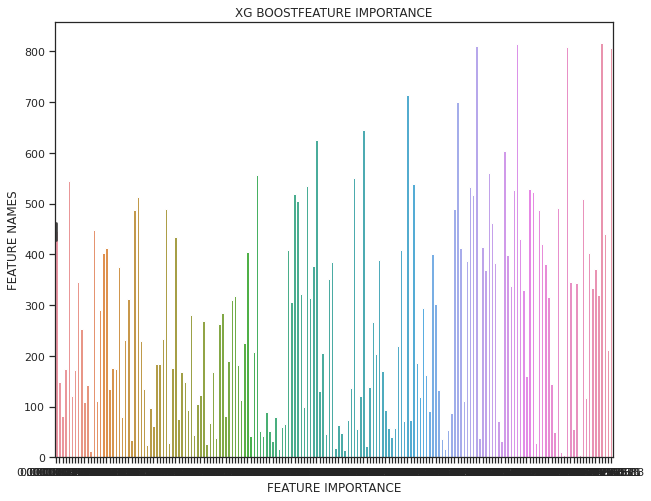

In [246]:
plot_feature_importance(xg_reg.feature_importances_,x_train.columns,'XG BOOST')